<a href="https://colab.research.google.com/github/boobopbiboop/saudi-employee-atrition/blob/main/Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!pip install catboost
!pip install ctgan
!pip install scikit-learn imbalanced-learn
!pip install ctabgan
!pip install "sdv>=1.16.0" --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement ctabgan (from versions: none)
ERROR: No matching distribution found for ctabgan
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.3/197.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.7 MB/s eta 0:00:00


# Import

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import RFE

#  Metrics & Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

# ML - Single Learning Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# ML - Ensemble Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from scipy.stats import uniform, randint

In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# '/content/drive/MyDrive/dataset-saudia'

Mounted at /content/drive


# Load

In [ ]:
#placeholder manual input
df = pd.read_excel("/content/drive/MyDrive/dataset-saudia/Original Dataset of Employee Attrition.xlsx")
df_raw = df.copy()
df.head(10)

,ID,Attrition,Gender,Age,Maritalstatus,Academic_degree,Years_Experience,Years_experience_lastorganization,Sector,Department,...,Job_Engagement,Distance_to_work,Work_Live_Balance,Physical_Stress,Psychological_Exhaustion,Job_Stability,Health_Issues,Environment_Satisfaction,Job_Satisfaction,Job_Opportunities
0,11,Yes,Female,31 to 40,Married,Master's,Less than 5 years,Less than 5 years,Medical sector,Accounting,...,Medium,Medium,Medium,Yes,No,No,Yes,Medium,Not satisfied,Yes
1,12,No,Female,21 to 30,Single,Master's,Less than 5 years,Less than 5 years,Medical sector,Accounting,...,Medium,Medium,Medium,No,No,Yes,No,Medium,Satisfied,No
2,13,No,Female,21 to 30,Single,Bachelor's,Less than 5 years,Less than 5 years,Education sector,Teaching,...,Medium,Close,Medium,Yes,Sometimes,No,No,Medium,Satisfied,Yes
3,14,No,Female,21 to 30,Single,Bachelor's,Less than 5 years,Less than 5 years,Education sector,Teaching,...,Medium,Medium,Medium,Yes,Yes,No,No,Low,Not satisfied,No
4,15,No,Female,21 to 30,Single,Bachelor's,Less than 5 years,Less than 5 years,Education sector,Teaching,...,Medium,Medium,Medium,Sometimes,Sometimes,No,No,Medium,Not satisfied,No
5,16,No,Female,21 to 30,Single,Bachelor's,Less than 5 years,Less than 5 years,Education sector,Teaching,...,Medium,Close,Medium,Yes,Yes,No,No,Low,Not satisfied,Yes
6,17,Yes,Female,31 to 40,Married,Bachelor's,Less than 5 years,Less than 5 years,Education sector,Teaching,...,Medium,Close,Difficult,Yes,Yes,No,No,Medium,Satisfied,No
7,18,No,Female,31 to 40,Married,Bachelor's,From 5 to 10 years,From 5 to 10 years,Education sector,Teaching,...,Medium,Medium,Medium,Sometimes,Sometimes,Yes,No,Medium,Very satisfied,Yes
8,20,Yes,Female,31 to 40,Married,Master's,From 5 to 10 years,Less than 5 years,Education sector,Teaching,...,Medium,Medium,Difficult,Yes,Yes,No,No,Medium,Satisfied,No
9,21,Yes,Female,21 to 30,Married,Bachelor's,Less than 5 years,Less than 5 years,Communications and IT sector,Relations,...,Difficult,Far,Difficult,Yes,Yes,Yes,Yes,High,Very satisfied,Yes


## EDA

## Basic Info

In [ ]:
print(f"Shape: {df.shape}")

Shape: (1191, 35)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   ID                                          1191 non-null   int64 
 1   Attrition                                   1191 non-null   object
 2   Gender                                      1191 non-null   object
 3   Age                                         1191 non-null   object
 4    Maritalstatus                              1191 non-null   object
 5    Academic_degree                            1191 non-null   object
 6   Years_Experience                            1191 non-null   object
 7   Years_experience_lastorganization           1191 non-null   object
 8   Sector                                      1191 non-null   object
 9   Department                                  1191 non-null   object
 10  JobTitle                

In [ ]:
df.describe()

,ID,Allowances
count,1191.000000,1191.000000
mean,612.910999,1.222502
std,346.732295,1.187483
min,11.000000,0.000000
25%,314.500000,0.000000
50%,613.000000,1.000000
75%,912.500000,2.000000
max,1213.000000,4.000000


## Data Quality check

Memeriksa apakah ada missing value pada dataset

In [ ]:
from pandas._libs import missing
misval = df.isnull().sum()
percentage_misval = df.isnull().sum()/len(df)*100

missing_info = pd.DataFrame({
    'Missing_Count': misval,
    'Percentage': percentage_misval
    })

missing_info

,Missing_Count,Percentage
ID,0,0.0
Attrition,0,0.0
Gender,0,0.0
Age,0,0.0
Maritalstatus,0,0.0
Academic_degree,0,0.0
Years_Experience,0,0.0
Years_experience_lastorganization,0,0.0
Sector,0,0.0
Department,0,0.0


Duplicated Data

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df.columns.tolist())


['ID', 'Attrition', 'Gender ', 'Age', ' Maritalstatus', '\xa0Academic_degree ', 'Years_Experience', 'Years_experience_lastorganization', 'Sector', 'Department', 'JobTitle', 'MonthlySalary', 'Allowances', 'MedicalInsurance', 'Bonus', 'OverTime', 'Payment_Overtime', 'Rewards&Wages_Satisfaction', 'Get_ Deserved_Promotion', 'Training_programs_ During_last_three_years', 'Useful_Training_Programs', 'Business_Travel', 'Job_Support', 'Recognition', 'Emotional_Commitment', 'Job_Engagement', 'Distance_to_work', 'Work_Live_Balance', 'Physical_Stress', 'Psychological_Exhaustion', 'Job_Stability', 'Health_Issues', 'Environment_Satisfaction', 'Job_Satisfaction', 'Job_Opportunities']


In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('&', 'n').str.replace('__', '_')

## Analisis Fitur Numerikal

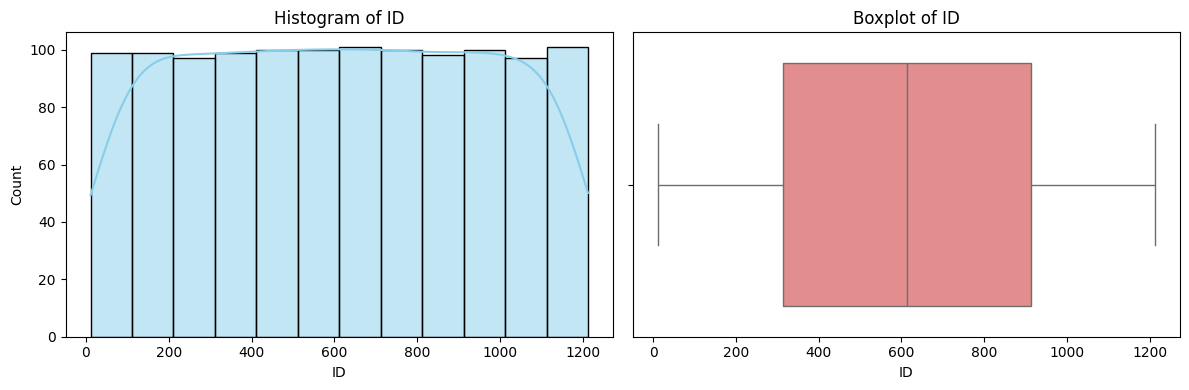

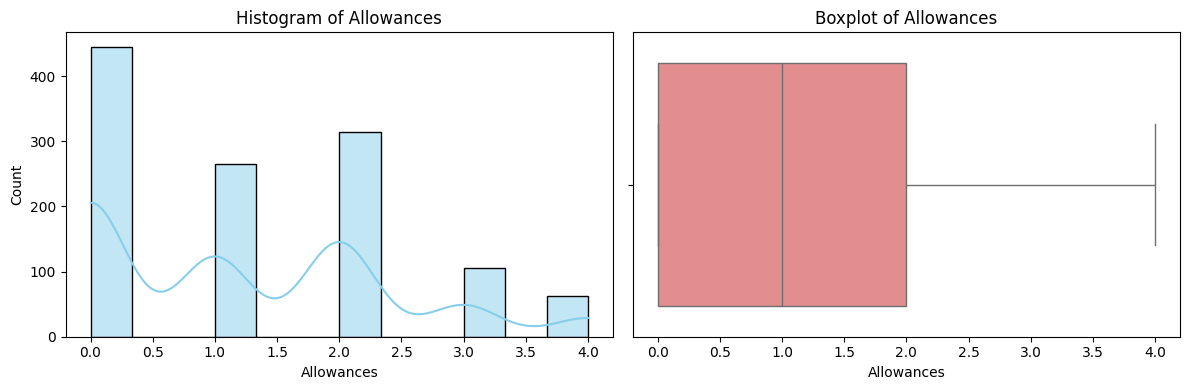

In [ ]:
quantitative_vars = ['ID','Allowances']

for col in quantitative_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

## Analisis Fitur Kategorikal

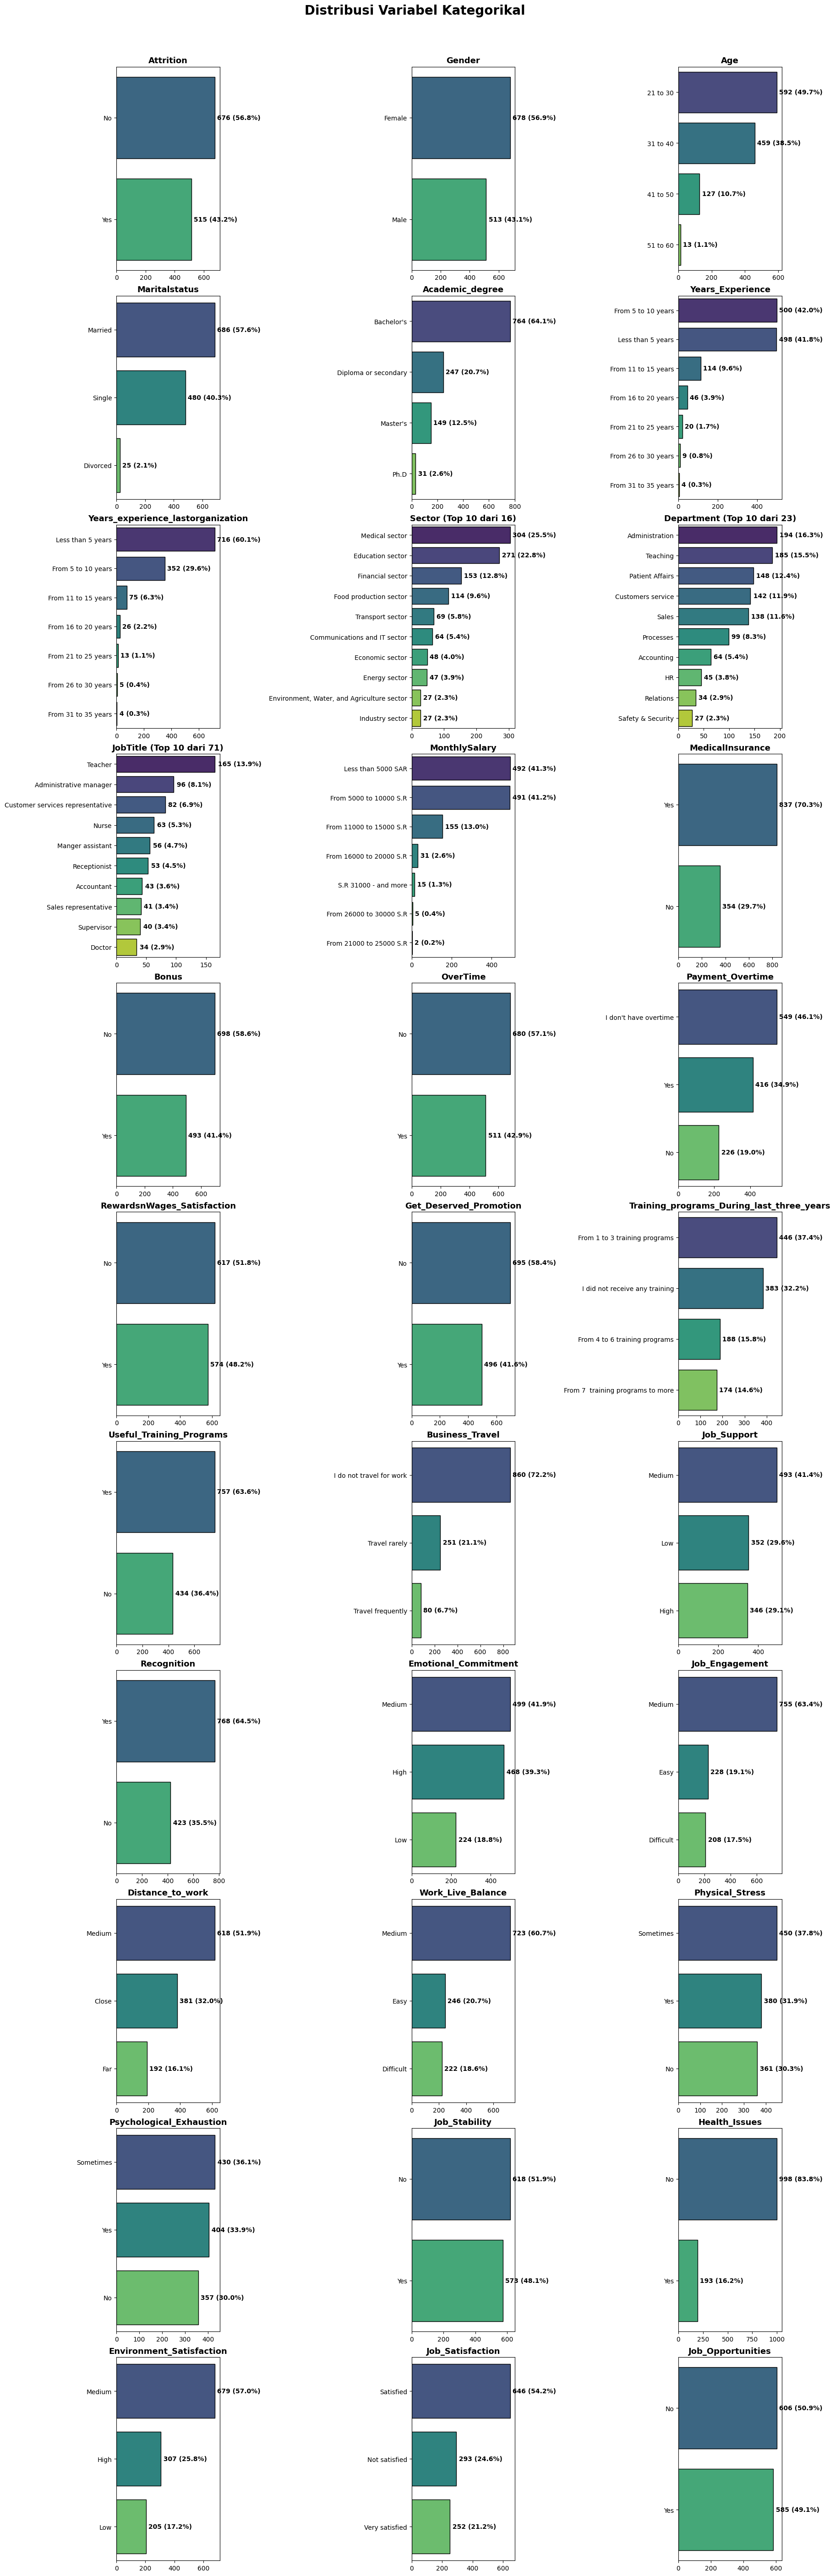

In [ ]:
def plot_all_categorical_grid(df, max_categories=10, cols_per_row=3):
    # Ambil semua kolom object (kategorikal)
    qualitative_vars = df.select_dtypes(include=['object']).columns

    n_plots = len(qualitative_vars)
    n_rows  = (n_plots + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(n_rows, cols_per_row,
                             figsize=(18, 5 * n_rows),
                             constrained_layout=True)
    axes = axes.flatten() if n_plots > 1 else [axes]

    for idx, col in enumerate(qualitative_vars):

        df[col] = df[col].str.strip()
        ax = axes[idx]

        # Hitung frekuensi (full)
        full_counts = df[col].value_counts()
        total_rows  = len(df)

        # Top N saja kalau terlalu banyak
        if len(full_counts) > max_categories:
            counts = full_counts.head(max_categories)
            title_suffix = f" (Top {max_categories} dari {len(full_counts)})";
        else:
            counts = full_counts
            title_suffix = ""

        percentages = (counts / total_rows * 100).round(1)

        # Horizontal bar = paling aman buat nama panjang
        sns.barplot(x=counts.values, y=counts.index, ax=ax, hue=counts.index, palette="viridis", legend=False, edgecolor="black", linewidth=1)

        # Label Count + % di ujung bar
        for i, (cat, cnt) in enumerate(counts.items()):
            pct = percentages[cat]
            ax.text(cnt + total_rows*0.001, i, f' {cnt:,} ({pct}%) ',
                    va='center', fontsize=10, fontweight='bold', color='black')

        ax.set_title(f"{col}{title_suffix}", fontsize=13, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Hapus subplot yang tidak terpakai
    for j in range(idx+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle('Distribusi Variabel Kategorikal',
                 fontsize=20, fontweight='bold', y=1.02)
    plt.show()

# PANGGIL SEKALI AJA – SEMUA SELESAI!
plot_all_categorical_grid(df, max_categories=10, cols_per_row=3)

In [ ]:
qualitative_vars = df.select_dtypes(include=['object']).columns
for col in qualitative_vars:
    print(f"\n--- {col} ---")
    value_counts = df[col].value_counts()
    value_percentages = df[col].value_counts(normalize=True) * 100

    analysis_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_percentages.round(2)
    })

    print(analysis_df)
    print(f"Unique values: {df[col].nunique()}")
    print(f"Most common: {value_counts.index[0]} ({value_counts.iloc[0]} occurrences, {value_percentages.iloc[0]:.2f}%)")



--- Attrition ---
           Count  Percentage
Attrition                   
No           676       56.76
Yes          515       43.24
Unique values: 2
Most common: No (676 occurrences, 56.76%)

--- Gender ---
        Count  Percentage
Gender                   
Female    678       56.93
Male      513       43.07
Unique values: 2
Most common: Female (678 occurrences, 56.93%)

--- Age ---
          Count  Percentage
Age                        
21 to 30    592       49.71
31 to 40    459       38.54
41 to 50    127       10.66
51 to 60     13        1.09
Unique values: 4
Most common: 21 to 30 (592 occurrences, 49.71%)

--- Maritalstatus ---
               Count  Percentage
Maritalstatus                   
Married          686        57.6
Single           480        40.3
Divorced          25         2.1
Unique values: 3
Most common: Married (686 occurrences, 57.60%)

--- Academic_degree ---
                      Count  Percentage
Academic_degree                        
Bachelor's          

## Atrition Rate

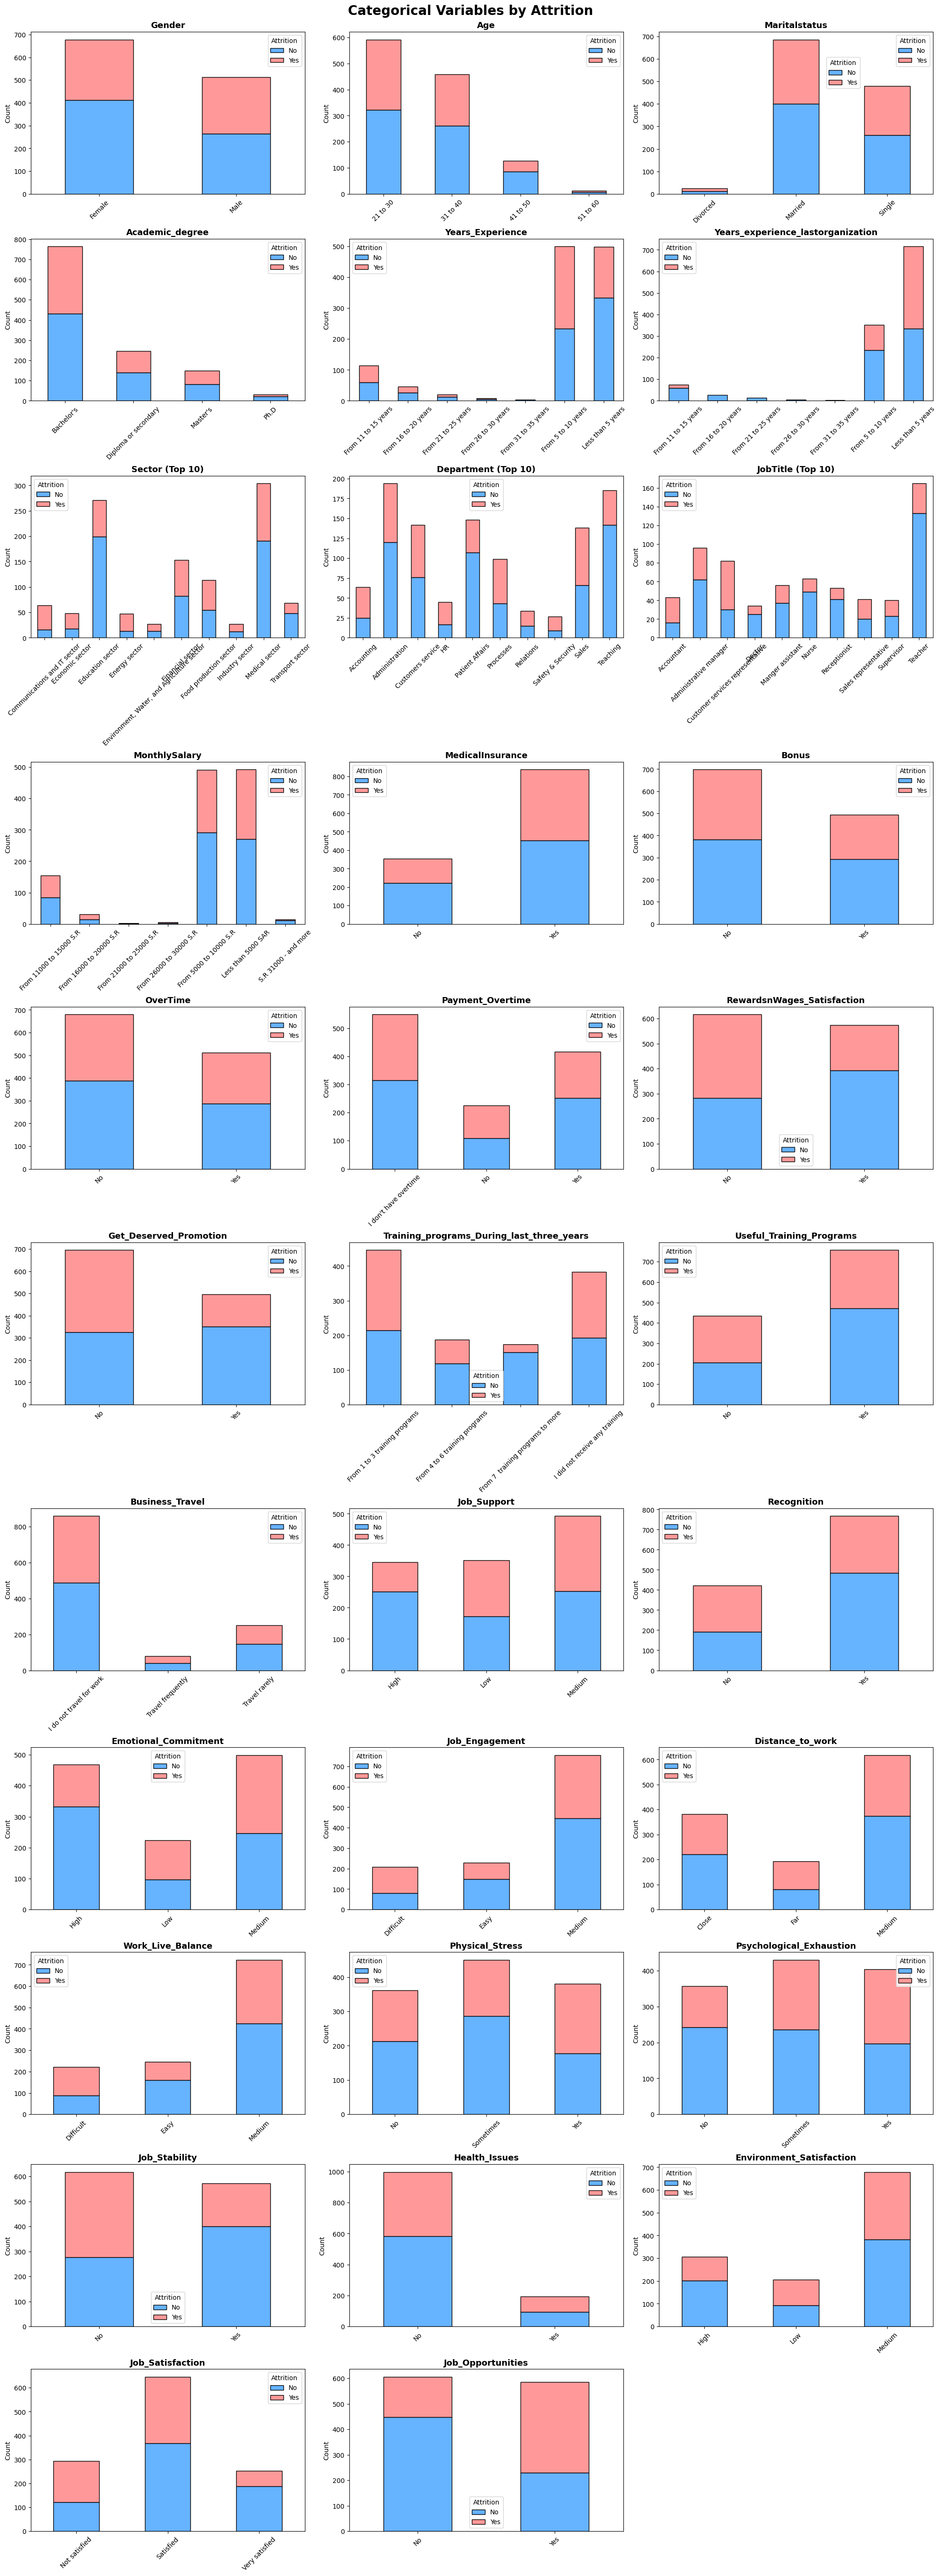

In [ ]:
def plot_categorical_by_attrition(df, max_categories=10, cols_per_row=3):
    qualitative_vars = df.select_dtypes(include=['object']).columns
    qualitative_vars = [col for col in qualitative_vars if col.lower() != "attrition"]

    n_plots = len(qualitative_vars)
    n_rows = (n_plots + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(
        n_rows, cols_per_row,
        figsize=(20, 5 * n_rows),
        constrained_layout=True
    )
    axes = axes.flatten()

    for idx, col in enumerate(qualitative_vars):
        ax = axes[idx]

        full_counts = df[col].value_counts()

        if len(full_counts) > max_categories:
            top_categories = full_counts.head(max_categories).index
            sub_df = df[df[col].isin(top_categories)]
            suffix = f" (Top {max_categories})"
        else:
            top_categories = full_counts.index
            sub_df = df
            suffix = ""

        ct = pd.crosstab(sub_df[col], sub_df["Attrition"])

        ct.plot(
            kind="bar", stacked=True, ax=ax,
            color=['#66b3ff', '#ff9999'], edgecolor='black'
        )

        ax.set_title(f"{col}{suffix}", fontsize=13, fontweight='bold')
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    # Legend global
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title="Attrition", bbox_to_anchor=(0.92, 0.98))

    fig.suptitle("Categorical Variables by Attrition", fontsize=20, fontweight="bold")
    plt.show()

plot_categorical_by_attrition(df)

In [ ]:
def print_categorical_attrition_stats(df, max_categories=10):
    qualitative_vars = df.select_dtypes(include=['object']).columns
    qualitative_vars = [col for col in qualitative_vars if col.lower() != "attrition"]

    for col in qualitative_vars:
        full_counts = df[col].value_counts()

        # Top N kategori
        if len(full_counts) > max_categories:
            selected = full_counts.head(max_categories).index
            sub_df = df[df[col].isin(selected)]
            suffix = f" (Top {max_categories})"
        else:
            sub_df = df
            suffix = ""

        # Crosstab by Attrition → Yes/No
        ct = pd.crosstab(sub_df[col], sub_df["Attrition"])

        # Hanya tampilkan tabel "per kategori", bukan per kolom
        for category in ct.index:
            counts = ct.loc[category]
            total = counts.sum()
            percentages = (counts / total * 100).round(2)

            # Gabungkan count + persentase
            table = pd.DataFrame({
                "Count": counts,
                "Percentage": percentages
            })

            print(f"\n--- {col}: {category}{suffix} ---")
            print(table)
        print("\n" + "="*70)


print_categorical_attrition_stats(df)


--- Gender: Female ---
           Count  Percentage
Attrition                   
No           412       60.77
Yes          266       39.23

--- Gender: Male ---
           Count  Percentage
Attrition                   
No           264       51.46
Yes          249       48.54


--- Age: 21 to 30 ---
           Count  Percentage
Attrition                   
No           323       54.56
Yes          269       45.44

--- Age: 31 to 40 ---
           Count  Percentage
Attrition                   
No           261       56.86
Yes          198       43.14

--- Age: 41 to 50 ---
           Count  Percentage
Attrition                   
No            85       66.93
Yes           42       33.07

--- Age: 51 to 60 ---
           Count  Percentage
Attrition                   
No             7       53.85
Yes            6       46.15


--- Maritalstatus: Divorced ---
           Count  Percentage
Attrition                   
No            13        52.0
Yes           12        48.0

--- Maritalsta

## Correlation Analysis

Attrition_encoded    0
OverTime_encoded     0
dtype: int64


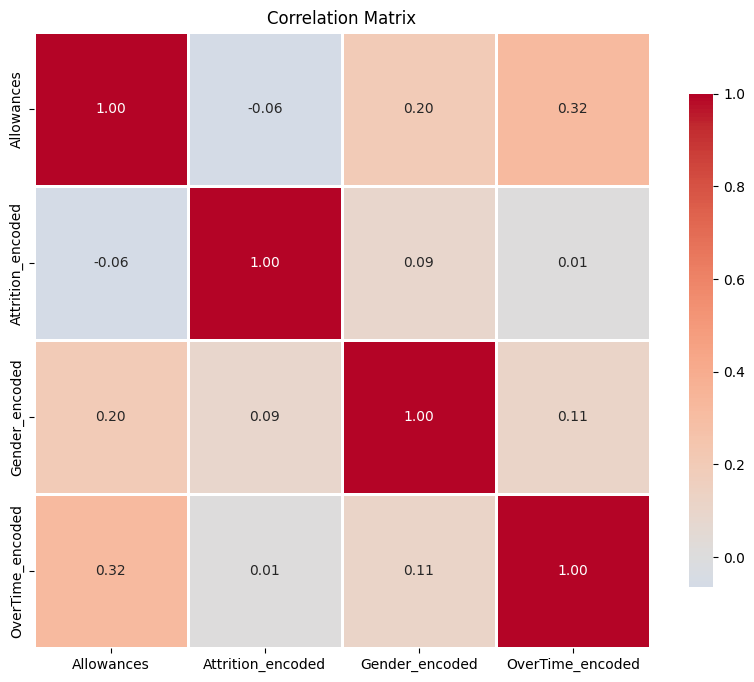

In [ ]:

df_corr = df.copy()

df_corr['Attrition_encoded'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df_corr['OverTime_encoded']  = df['OverTime'].map({'Yes': 1, 'No': 0})
df_corr['Gender_encoded']    = df['Gender'].map({'Male': 1, 'Female': 0})


print(df_corr[['Attrition_encoded', 'OverTime_encoded']].isna().sum())
corr_matrix = df_corr[['Allowances', 'Attrition_encoded', 'Gender_encoded', 'OverTime_encoded']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

## Nominal Binary Variables

In [ ]:
df_encoded = df.copy()

Nominal Binary Variables with Yes, No:

1. Job Opportunities
2. Job Stability
3. Health Issues
4. Recognition
5. Useful Training Programs
6. Get Deserved Promotion
7. Rewards Wages Satisfaction
8. Over Time
9. Bonus
10. Medical Insurance
11. Attrition
12. Gender (Male: 1, Female: 0)


In [ ]:
df_encoded.columns.tolist()

['ID',
 'Attrition',
 'Gender',
 'Age',
 'Maritalstatus',
 'Academic_degree',
 'Years_Experience',
 'Years_experience_lastorganization',
 'Sector',
 'Department',
 'JobTitle',
 'MonthlySalary',
 'Allowances',
 'MedicalInsurance',
 'Bonus',
 'OverTime',
 'Payment_Overtime',
 'RewardsnWages_Satisfaction',
 'Get_Deserved_Promotion',
 'Training_programs_During_last_three_years',
 'Useful_Training_Programs',
 'Business_Travel',
 'Job_Support',
 'Recognition',
 'Emotional_Commitment',
 'Job_Engagement',
 'Distance_to_work',
 'Work_Live_Balance',
 'Physical_Stress',
 'Psychological_Exhaustion',
 'Job_Stability',
 'Health_Issues',
 'Environment_Satisfaction',
 'Job_Satisfaction',
 'Job_Opportunities']

In [ ]:
binary_cols = [
    "Job_Opportunities",
    "Job_Stability",
    "Health_Issues",
    "Recognition",
    "Useful_Training_Programs",
    "Get_Deserved_Promotion",
    "RewardsnWages_Satisfaction",
    "OverTime",
    "Bonus",
    "MedicalInsurance",
    "Attrition"
]

binary_map = {"No": 0, "Yes": 1}

df_before = df_encoded.copy()

print("Before encoding (unique values)")
for col in binary_cols:
    print(f"{col}: {df_encoded[col].unique()}")

for col in binary_cols:
    df_encoded[col] = (
        df_encoded[col]
        .astype(str)
        .str.strip()
        .str.title()
        .map(binary_map)
    )

print("\nAfter encoding (unique values)")
for col in binary_cols:
    print(f"{col}: {df_encoded[col].unique()}")


Before encoding (unique values)
Job_Opportunities: ['Yes' 'No']
Job_Stability: ['No' 'Yes']
Health_Issues: ['Yes' 'No']
Recognition: ['No' 'Yes']
Useful_Training_Programs: ['Yes' 'No']
Get_Deserved_Promotion: ['Yes' 'No']
RewardsnWages_Satisfaction: ['Yes' 'No']
OverTime: ['No' 'Yes']
Bonus: ['No' 'Yes']
MedicalInsurance: ['No' 'Yes']
Attrition: ['Yes' 'No']

After encoding (unique values)
Job_Opportunities: [1 0]
Job_Stability: [0 1]
Health_Issues: [1 0]
Recognition: [0 1]
Useful_Training_Programs: [1 0]
Get_Deserved_Promotion: [1 0]
RewardsnWages_Satisfaction: [1 0]
OverTime: [0 1]
Bonus: [0 1]
MedicalInsurance: [0 1]
Attrition: [1 0]


In [ ]:
gender_map = {"Male": 1, "Female": 0}

gender_before = df_before["Gender"].unique()

df_encoded["Gender"] = (
    df_encoded["Gender"]
    .astype(str)
    .str.strip()
    .str.title()
    .map(gender_map)
)

gender_after = df_encoded["Gender"].unique()

print("Before encoding Gender:", gender_before)
print("After encoding Gender:", gender_after)


Before encoding Gender: ['Female' 'Male']
After encoding Gender: [0 1]


In [ ]:
df_base = df_encoded.copy()


### Ordinal Variables

1. `Job Satisfaction`

|  |  |
| ---------------- | ---- |
| Not satisfied    | 0    |
| Satisfied        | 1    |
| Very satisfied   | 2    |

<br>

2. `Environment_Satisfaction`, `Emotional_Commitment`, `Job_Support`

|  |  |
| ---------------- | ---- |
| Low           | 0    |
| Medium        | 1    |
| High          | 2    |
<br>

3. `Psychological_Exhaustion`, `Physical_Stress`

<br>

|  |  |
| ---------------- | ---- |
| No           | 0    |
| Sometime        | 1    |
| Yes          | 2    |
<br>

4. `Work_Live_Balance` , `Job_Engagement`

|  |  |
| ---------------- | ---- |
| Easy           | 0    |
| Medium        | 1    |
| Difficult          | 2    |
<br>

5. `Distance_to_work`

|  |  |
| ---------------- | ---- |
| Close          | 0    |
| Medium        | 1    |
| Far          | 2    |
<br>

6. `Business Travel`

|  |  |
| ---------------- | ---- |
| No Trabel           | 0    |
| Rarely        | 1    |
| Frequently          | 2    |
<br>

7. `Training_programs_During_last_three_years`

|   | |
| ------------ | ---- |
| No trainings | 0    |
| 1 – 3        | 1    |
| 4 – 6        | 2    |
| 7 – more     | 3    |
<br>

8. `Payment_Overtime`

|   |  |
| ----------- | ---- |
| No Overtime | 0    |
| No          | 1    |
| Yes         | 2    |
<br>

9.` MonthlySalary `

|| |
| ------------ | ---- |
| 1k – 5k      | 0    |
| 6k – 10k     | 1    |
| 11k – 15k    | 2    |
| 16k – more   | 3    |

<br>

10. `Years_experience_lastorganization, Years_Experience`


 |  |  |
| ------------------ | ---- |
| 1 – 5              | 0    |
| 6 – 10             | 1    |
| 11 – more          | 2    |
<br>

11. `Academic_degree`

|         | |
| -------------------- | ---- |
| Diploma or Secondary | 0    |
| Bachelor             | 1    |
| Master               | 2    |
| Ph.D.                | 3    |

<br>

12. `Age`

|      |  |
| --------- | ---- |
| 21 – 30   | 0    |
| 31 – 40   | 1    |
| 41 – more | 2    |




In [ ]:
ordinal_maps = {
    "Job_Satisfaction": {
        "not Satisfied": 0, "satisfied": 1, "very satisfied": 2
    },

    "Environment_Satisfaction": {
        "low": 0, "medium": 1, "high": 2
    },

    "Emotional_Commitment": {
        "low": 0, "medium": 1, "high": 2
    },

    "Job_Support": {
        "low": 0, "Medium": 1, "High": 2
    },

    "Psychological_Exhaustion": {
        "No": 0, "Sometimes": 1, "Yes": 2
    },

    "Physical_Stress": {
        "No": 0, "Sometimes": 1, "Yes": 2
    },

    "Work_Live_Balance": {
        "Easy": 0, "Medium": 1, "Difficult": 2
    },

    "Job_Engagement": {
        "Easy": 0, "Medium": 1, "Difficult": 2
    },

    "Distance_to_work": {
        "Close": 0, "Medium": 1, "Far": 2
    },

    "Business_Travel": {
        "I Do Not Travel For Work": 0, "Travel Rarely": 1, "Travel Frequently": 2
    },

    "Training_programs_During_last_three_years": {
        "I Did Not Receive Any Training": 0,
        "From 1 To 3 Training Programs": 1,
        "From 4 To 6 Training Programs": 2,
        "From 7  Training Programs To More": 3
    },

    "Payment_Overtime": {
        "I Don't Have Overtime": 0, "No": 1, "Yes": 2
    },

    "MonthlySalary": {
        "Less Than 5000 Sar": 0,
        "From 5000 To 10000 S.R": 1,
        "From 11000 To 15000 S.R": 2,
        "From 16000 To 20000 S.R": 3,
        "From 21000 To 25000 S.R": 3,
        "From 26000 To 30000 S.R": 3,
        "S.R 31000 - And More": 3
    },

    "Years_Experience": {
        "Less Than 5 Years": 0,
        "From 5 To 10 Years": 1,
        "From 11 To 15 Years": 2,
        "From 16 To 20 Years": 2,
        "From 21 To 25 Years": 2,
        "From 26 To 30 Years": 2,
        "From 31 To 35 Years": 2
    },

    "Years_experience_lastorganization": {
        "Less Than 5 Years": 0,
        "From 5 To 10 Years": 1,
        "From 11 To 15 Years": 2,
        "From 16 To 20 Years": 2,
        "From 21 To 25 Years": 2,
        "From 26 To 30 Years": 2,
        "From 31 To 35 Years": 2
    },

    "Academic_degree": {
        "Diploma Or Secondary": 0,
        "Bachelor'S": 1,
        "Master'S": 2,
        "Ph.D": 3
    },

    "Age": {
        "21 To 30": 0,
        "31 To 40": 1,
        "41 To 50": 2,
        "51 To 60": 2
    }
}


In [ ]:
cols_to_normalize = list(ordinal_maps.keys())

for col in cols_to_normalize:
    df_base[col] = (
        df_base[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .str.replace(" +", " ", regex=True)   # hilangkan double spaces
    )


In [ ]:
for col, mapping in ordinal_maps.items():
    df_base[col] = (
        df_base[col]
        .astype(str)
        .str.strip()
        .str.title()
        .map(mapping)
    )


### Category grouping

A. Marital Status

In [ ]:
df_base["Maritalstatus"] = (
    df_base["Maritalstatus"]
    .astype(str).str.strip().str.title()
)

marital_map = {
    "Married": "Married",
    "Single": "Single",
    "Divorced": "Single"
}

df_base["Maritalstatus"] = df_base["Maritalstatus"].map(marital_map)


B. Sector

In [ ]:
df_base["Sector"] = (
    df_base["Sector"]
    .astype(str).str.strip().str.title()
)

sector_map = {
    "Financial Sector": "Financial",
    "Food Production Sector": "Food",
    "Medical Sector": "Medical"
}

df_base["Sector"] = df_base["Sector"].apply(
    lambda x: sector_map[x] if x in sector_map else "Other"
)


C. Departemen

In [ ]:
df_base["Department"] = (
    df_base["Department"]
    .astype(str).str.strip().str.title()
)

dept_map = {
    "Administration": "Administration",
    "Hr": "Administration",
    "Customers Service": "Customer Service",
    "Customer Service": "Customer Service",
    "Patient Affairs": "Patient Affairs",
    "Processes": "Processes",
    "Sales": "Sales",
    "Teaching": "Teaching"
}

df_base["Department"] = df_base["Department"].apply(
    lambda x: dept_map[x] if x in dept_map else "Other"
)


## One-HotEncoder (OHE)
Nominal Multi value Variables:

Pada dataset ***Saudia Attrition***, terdapat beberapa variabel kategorikall yang memiliki banyak kategori dan tidak ada urutan (*Nominal Multi value)*, contohnya pada `Marital Status` terdapat kategori Married, Single, Divorced.<br><br>
Setiap kategori tersebut dikonversi menggunakan One-Hot Encoding (OHE), menjadi kolom biner dengan nilai 0 atau 1. Nilai 1 berarti kategori tersebut aktif pada baris tersebut, sedangkan nilai 0 berarti tidak aktif.

Contoh:

Sebelum encoding:

**Sebelum encoding:**

| Marital Status |
|----------------|
| Married        |
| Single         |
| Divorced       |

**Sesudah encoding:**

| Married | Single | Divorced |
|---------|--------|----------|
| 1       | 0      | 0        |
| 0       | 1      | 0        |
| 0       | 0      | 1        |  



1. **`Marital Status`**:
- Married
- Single
- Divorced

2. **`Sector`**:

- Medical
- Education
- Other
- Financial
- Food


3. **`Department `**

- Accounting
- Teaching
- Other Administration
- Processes
- Customer Service
- Sales
- Patient Affairs



In [ ]:
df_non_tree = pd.get_dummies(
    df_base.copy(),
    columns=["Maritalstatus", "Sector", "Department"],
    drop_first=False
)

df_non_tree.shape




(1191, 45)

In [ ]:
df_non_tree.columns.tolist()

['ID',
 'Attrition',
 'Gender',
 'Age',
 'Academic_degree',
 'Years_Experience',
 'Years_experience_lastorganization',
 'JobTitle',
 'MonthlySalary',
 'Allowances',
 'MedicalInsurance',
 'Bonus',
 'OverTime',
 'Payment_Overtime',
 'RewardsnWages_Satisfaction',
 'Get_Deserved_Promotion',
 'Training_programs_During_last_three_years',
 'Useful_Training_Programs',
 'Business_Travel',
 'Job_Support',
 'Recognition',
 'Emotional_Commitment',
 'Job_Engagement',
 'Distance_to_work',
 'Work_Live_Balance',
 'Physical_Stress',
 'Psychological_Exhaustion',
 'Job_Stability',
 'Health_Issues',
 'Environment_Satisfaction',
 'Job_Satisfaction',
 'Job_Opportunities',
 'Maritalstatus_Married',
 'Maritalstatus_Single',
 'Sector_Financial',
 'Sector_Food',
 'Sector_Medical',
 'Sector_Other',
 'Department_Administration',
 'Department_Customer Service',
 'Department_Other',
 'Department_Patient Affairs',
 'Department_Processes',
 'Department_Sales',
 'Department_Teaching']

## Dataset Non-Tree

In [ ]:
print("df_non_tree shape:", df_non_tree.shape)
df_non_tree.head()


df_non_tree shape: (1191, 45)


,ID,Attrition,Gender,Age,Academic_degree,Years_Experience,Years_experience_lastorganization,JobTitle,MonthlySalary,Allowances,...,Sector_Food,Sector_Medical,Sector_Other,Department_Administration,Department_Customer Service,Department_Other,Department_Patient Affairs,Department_Processes,Department_Sales,Department_Teaching
0,11,1,0,1,2,0,0,Accountant,1,2,...,False,True,False,False,False,True,False,False,False,False
1,12,0,0,0,2,0,0,Accountant,2,2,...,False,True,False,False,False,True,False,False,False,False
2,13,0,0,0,1,0,0,Teacher,0,0,...,False,False,True,False,False,False,False,False,False,True
3,14,0,0,0,1,0,0,Teacher,0,0,...,False,False,True,False,False,False,False,False,False,True
4,15,0,0,0,1,0,0,Teacher,0,0,...,False,False,True,False,False,False,False,False,False,True


### MEstimateEncoder
**Nominal Many Value Variables:** <br>



Variabel `Job Title` memiliki jumlah kategori yang sangat banyak *(hight cardinality)*, sehingga tidak dapat dilakukan encoding dengan OHE karena jumlah kolom akan bertambah banyak.

<br>

`MEstimateEncoder` merupakah salah satu metode Target Encoding yang mengubah setiap kategori menjadi satu nilai numerik yang merepresentasikan kecenderungan kategori tersebut terhadap kelas target.

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
from category_encoders import MEstimateEncoder

df_tree = df_base.copy()

df_tree = df_tree.rename(columns={"JobTitle": "Jobtitle"})

nominal_for_m = ["Maritalstatus", "Sector", "Department", "Jobtitle"]

y = df_tree["Attrition"]

mencoder = MEstimateEncoder(cols=nominal_for_m, m=1)
df_tree[nominal_for_m] = mencoder.fit_transform(df_tree[nominal_for_m], y)

print("df_tree shape:", df_tree.shape)
df_tree.head()




df_tree shape: (1191, 35)


,ID,Attrition,Gender,Age,Maritalstatus,Academic_degree,Years_Experience,Years_experience_lastorganization,Sector,Department,...,Job_Engagement,Distance_to_work,Work_Live_Balance,Physical_Stress,Psychological_Exhaustion,Job_Stability,Health_Issues,Environment_Satisfaction,Job_Satisfaction,Job_Opportunities
0,11,1,0,1,0.415477,2,0,0,0.37191,0.571445,...,1,1,1,2,0,0,1,NaN,NaN,1
1,12,0,0,0,0.455400,2,0,0,0.37191,0.571445,...,1,1,1,0,0,1,0,NaN,NaN,0
2,13,0,0,0,0.455400,1,0,0,0.43870,0.233508,...,1,0,1,2,1,0,0,NaN,NaN,1
3,14,0,0,0,0.455400,1,0,0,0.43870,0.233508,...,1,1,1,2,2,0,0,NaN,NaN,0
4,15,0,0,0,0.455400,1,0,0,0.43870,0.233508,...,1,1,1,1,1,0,0,NaN,NaN,0


In [ ]:
df_non_tree = df_non_tree.drop(columns=["ID"])
df_tree = df_tree.drop(columns=["ID"])


In [ ]:
print("BASE    :", df_base.shape)
print("NON-TREE:", df_non_tree.shape)
print("TREE    :", df_tree.shape)


BASE    : (1191, 35)
NON-TREE: (1191, 44)
TREE    : (1191, 34)


## Numerical Columns

`Allowances`

## From Saudia Dataset

In [ ]:
# Tree model
df_tree_sd = pd.read_excel("/content/drive/MyDrive/dataset-saudia/Employee attrition dataset for tree-based models.xlsx")

# Non Tree model
df_non_tree_sd = pd.read_excel("/content/drive/MyDrive/dataset-saudia/Employee attrition dataset for non-tree-based models.xlsx")

### Tree Based Model

In [ ]:
print("Original    :", df.shape)
print("NON-TREE:", df_non_tree_sd.shape)
print("TREE    :", df_tree_sd.shape)


Original    : (1191, 35)
NON-TREE: (1174, 44)
TREE    : (1174, 34)


In [ ]:
df.columns.tolist()

['ID',
 'Attrition',
 'Gender',
 'Age',
 'Maritalstatus',
 'Academic_degree',
 'Years_Experience',
 'Years_experience_lastorganization',
 'Sector',
 'Department',
 'JobTitle',
 'MonthlySalary',
 'Allowances',
 'MedicalInsurance',
 'Bonus',
 'OverTime',
 'Payment_Overtime',
 'RewardsnWages_Satisfaction',
 'Get_Deserved_Promotion',
 'Training_programs_During_last_three_years',
 'Useful_Training_Programs',
 'Business_Travel',
 'Job_Support',
 'Recognition',
 'Emotional_Commitment',
 'Job_Engagement',
 'Distance_to_work',
 'Work_Live_Balance',
 'Physical_Stress',
 'Psychological_Exhaustion',
 'Job_Stability',
 'Health_Issues',
 'Environment_Satisfaction',
 'Job_Satisfaction',
 'Job_Opportunities']

In [ ]:
df_non_tree_sd.columns.tolist()

['Attrition',
 'Gender',
 'Age',
 'Academic_degree',
 'Years_Experience',
 'Years_experience_lastorganization',
 'JobTitle',
 'MonthlySalary',
 'Allowances',
 'MedicalInsurance',
 'Bonus',
 'OverTime',
 'Payment_Overtime',
 'Rewards_Wages_Satisfaction',
 'Get_Deserved_Promotion',
 'Training_programs_During_last_three_years',
 'Useful_Training_Programs',
 'Business_Travel',
 'Job_Support',
 'Recognition',
 'Emotional_Commitment',
 'Job_Engagement',
 'Distance_to_work',
 'Work_Live_Balance',
 'Physical_Stress',
 'Psychological_Exhaustion',
 'Job_Stability',
 'Health_Issues',
 'Environment_Satisfaction',
 'Job_Satisfaction',
 'Job_Opportunities',
 'Maritalstatus_Married',
 'Maritalstatus_Single',
 'Sector_Financial',
 'Sector_Food',
 'Sector_Medical',
 'Sector_Other',
 'Department_Administration',
 'Department_Customer Service',
 'Department_Other',
 'Department_Patient Affairs',
 'Department_Processes',
 'Department_Sales',
 'Department_Teaching']

In [ ]:
df_tree_sd.head(10)

,Attrition,Gender,Age,Maritalstatus,Academic_degree,Years_Experience,Years_experience_lastorganization,Sector,Department,JobTitle,...,Job_Engagement,Distance_to_work,Work_Live_Balance,Physical_Stress,Psychological_Exhaustion,Job_Stability,Health_Issues,Environment_Satisfaction,Job_Satisfaction,Job_Opportunities
0,1,0,1,0.405953,2,0,0,0.359278,0.600378,0.623277,...,1,1,1,2,0,0,1,1,0,1
1,0,0,0,0.447209,2,0,0,0.359278,0.600378,0.623277,...,1,1,1,0,0,1,0,1,1,0
2,0,0,0,0.447209,1,0,0,0.260830,0.229320,0.190450,...,1,0,1,2,1,0,0,1,1,1
3,0,0,0,0.447209,1,0,0,0.260830,0.229320,0.190450,...,1,1,1,2,2,0,0,0,0,0
4,0,0,0,0.447209,1,0,0,0.260830,0.229320,0.190450,...,1,1,1,1,1,0,0,1,0,0
5,0,0,0,0.447209,1,0,0,0.260830,0.229320,0.190450,...,1,0,1,2,2,0,0,0,0,1
6,1,0,1,0.405953,1,0,0,0.260830,0.229320,0.190450,...,1,0,2,2,2,0,0,1,1,0
7,0,0,1,0.405953,1,1,1,0.260830,0.229320,0.190450,...,1,1,1,1,1,1,0,1,2,1
8,1,0,1,0.405953,2,1,0,0.260830,0.229320,0.190450,...,1,1,2,2,2,0,0,1,1,0
9,1,0,0,0.405953,1,0,0,0.565187,0.556474,0.686866,...,2,2,2,2,2,1,1,2,2,1


In [ ]:
df_tree.dtypes

,0
Attrition,int64
Gender,int64
Age,int64
Maritalstatus,float64
Academic_degree,int64
Years_Experience,int64
Years_experience_lastorganization,int64
Sector,float64
Department,float64
Jobtitle,float64


In [ ]:
df_non_tree_sd.head(10)

,Attrition,Gender,Age,Academic_degree,Years_Experience,Years_experience_lastorganization,JobTitle,MonthlySalary,Allowances,MedicalInsurance,...,Sector_Food,Sector_Medical,Sector_Other,Department_Administration,Department_Customer Service,Department_Other,Department_Patient Affairs,Department_Processes,Department_Sales,Department_Teaching
0,1,0,1,2,0,0,0.623277,1,2,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0.623277,2,2,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,1,1,0,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,1,1,1,1,0.190450,2,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,0,1,2,1,0,0.190450,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,1,0,0,0.686866,0,1,1,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
df_non_tree.head(10)

,Attrition,Gender,Age,Academic_degree,Years_Experience,Years_experience_lastorganization,JobTitle,MonthlySalary,Allowances,MedicalInsurance,...,Sector_Food,Sector_Medical,Sector_Other,Department_Administration,Department_Customer Service,Department_Other,Department_Patient Affairs,Department_Processes,Department_Sales,Department_Teaching
0,1,0,1,2,0,0,Accountant,1,2,0,...,False,True,False,False,False,True,False,False,False,False
1,0,0,0,2,0,0,Accountant,2,2,1,...,False,True,False,False,False,True,False,False,False,False
2,0,0,0,1,0,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
3,0,0,0,1,0,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
4,0,0,0,1,0,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
5,0,0,0,1,0,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
6,1,0,1,1,0,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
7,0,0,1,1,1,1,Teacher,2,0,0,...,False,False,True,False,False,False,False,False,False,True
8,1,0,1,2,1,0,Teacher,0,0,0,...,False,False,True,False,False,False,False,False,False,True
9,1,0,0,1,0,0,Relationships Specialist,0,1,1,...,False,False,True,False,False,True,False,False,False,False


In [ ]:
df_non_tree_sd.columns.tolist()


['Attrition',
 'Gender',
 'Age',
 'Academic_degree',
 'Years_Experience',
 'Years_experience_lastorganization',
 'JobTitle',
 'MonthlySalary',
 'Allowances',
 'MedicalInsurance',
 'Bonus',
 'OverTime',
 'Payment_Overtime',
 'Rewards_Wages_Satisfaction',
 'Get_Deserved_Promotion',
 'Training_programs_During_last_three_years',
 'Useful_Training_Programs',
 'Business_Travel',
 'Job_Support',
 'Recognition',
 'Emotional_Commitment',
 'Job_Engagement',
 'Distance_to_work',
 'Work_Live_Balance',
 'Physical_Stress',
 'Psychological_Exhaustion',
 'Job_Stability',
 'Health_Issues',
 'Environment_Satisfaction',
 'Job_Satisfaction',
 'Job_Opportunities',
 'Maritalstatus_Married',
 'Maritalstatus_Single',
 'Sector_Financial',
 'Sector_Food',
 'Sector_Medical',
 'Sector_Other',
 'Department_Administration',
 'Department_Customer Service',
 'Department_Other',
 'Department_Patient Affairs',
 'Department_Processes',
 'Department_Sales',
 'Department_Teaching']

# Model

## TRAIN-TEST SPLIT (Non Tree)

In [ ]:
X_non_tree = df_non_tree_sd.drop(columns=['Attrition'])
y_non_tree = df_non_tree_sd['Attrition']

In [ ]:
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(
    X_non_tree, y_non_tree, test_size=0.2, random_state=42, stratify=y_non_tree
)

In [ ]:
print(f"Training set: {X_train_nt.shape[0]} samples ({X_train_nt.shape[0]/len(X_non_tree)*100:.1f}%)")
print(f"Test set: {X_test_nt.shape[0]} samples ({X_test_nt.shape[0]/len(X_non_tree)*100:.1f}%)")
print(f"Features: {X_train_nt.shape[1]}")

Training set: 939 samples (80.0%)
Test set: 235 samples (20.0%)
Features: 43


In [ ]:
print(f"   Training set:")
print(f"      No Attrition (0): {(y_train_nt == 0).sum()} ({(y_train_nt == 0).sum()/len(y_train_nt)*100:.1f}%)")
print(f"      Attrition (1): {(y_train_nt == 1).sum()} ({(y_train_nt == 1).sum()/len(y_train_nt)*100:.1f}%)")
print(f"   Test set:")
print(f"      No Attrition (0): {(y_test_nt == 0).sum()} ({(y_test_nt == 0).sum()/len(y_test_nt)*100:.1f}%)")
print(f"      Attrition (1): {(y_test_nt == 1).sum()} ({(y_test_nt == 1).sum()/len(y_test_nt)*100:.1f}%)")

   Training set:
      No Attrition (0): 541 (57.6%)
      Attrition (1): 398 (42.4%)
   Test set:
      No Attrition (0): 135 (57.4%)
      Attrition (1): 100 (42.6%)


## FEATURE SELECTION

In [ ]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train_nt, y_train_nt)
rf_importance = pd.DataFrame({
    'Feature': X_train_nt.columns,
    'Importance': rf_selector.feature_importances_
}).sort_values('Importance', ascending=False)

In [ ]:
rf_importance[['Feature', 'Importance']]

,Feature,Importance
5,JobTitle,0.142828
29,Job_Opportunities,0.072400
3,Years_Experience,0.066718
4,Years_experience_lastorganization,0.050547
14,Training_programs_During_last_three_years,0.035602
7,Allowances,0.035061
19,Emotional_Commitment,0.028649
20,Job_Engagement,0.025944
22,Work_Live_Balance,0.025722
24,Psychological_Exhaustion,0.024912


In [ ]:
sorted_features = rf_importance['Feature'].tolist()

n_features_to_test = [5, 10, 15, 20, 25, 30, 35, 40, len(sorted_features)]
results = []

print(f"{'Jumlah Fitur':>12} {'F1 Score':>10} {'Accuracy':>10} {'AUC':>8}")
print("-" * 45)

best_f1 = 0
best_n = 0
best_features = None

for n in n_features_to_test:
    if n > len(sorted_features):
        n = len(sorted_features)

    # Ambil n fitur teratas
    top_n_features = sorted_features[:n]
    X_train_selected = X_train_nt[top_n_features]

    # Cross-validation (5-fold)
    rf_temp = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

    f1_scores = cross_val_score(rf_temp, X_train_selected, y_train_nt, cv=5, scoring='f1')
    acc_scores = cross_val_score(rf_temp, X_train_selected, y_train_nt, cv=5, scoring='accuracy')
    auc_scores = cross_val_score(rf_temp, X_train_selected, y_train_nt, cv=5, scoring='roc_auc')

    mean_f1 = f1_scores.mean()
    mean_acc = acc_scores.mean()
    mean_auc = auc_scores.mean()

    print(f"{n:>12} {mean_f1:>10.4f} {mean_acc:>10.4f} {mean_auc:>8.4f}")

    results.append({
        'n_features': n,
        'f1_mean': mean_f1,
        'f1_std': f1_scores.std(),
        'accuracy': mean_acc,
        'auc': mean_auc
    })

    # Simpan yang terbaik (berdasarkan F1-score)
    if mean_f1 > best_f1:
        best_f1 = mean_f1
        best_n = n
        best_features = top_n_features.copy()

results_df = pd.DataFrame(results)

Jumlah Fitur   F1 Score   Accuracy      AUC
---------------------------------------------
           5     0.7557     0.7998   0.8792
          10     0.7796     0.8200   0.8884
          15     0.7991     0.8381   0.9092
          20     0.7792     0.8189   0.9017
          25     0.7702     0.8147   0.9007
          30     0.7704     0.8168   0.9022
          35     0.7644     0.8115   0.8979
          40     0.7634     0.8104   0.8924
          43     0.7620     0.8104   0.8972


In [ ]:
results_df

,n_features,f1_mean,f1_std,accuracy,auc
0,5,0.755697,0.037071,0.799784,0.879237
1,10,0.779616,0.025277,0.820019,0.888396
2,15,0.799103,0.037661,0.838116,0.909180
3,20,0.779158,0.043466,0.818944,0.901713
4,25,0.770215,0.067344,0.814660,0.900661
5,30,0.770432,0.062542,0.816822,0.902242
6,35,0.764422,0.046962,0.811492,0.897854
7,40,0.763393,0.058060,0.810433,0.892384
8,43,0.761963,0.054311,0.810433,0.897212


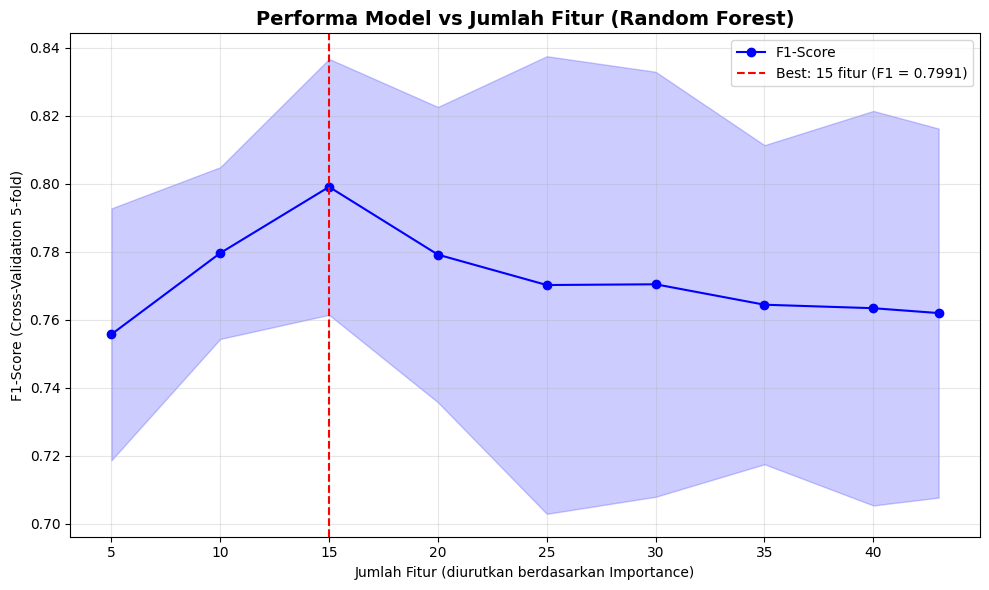

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['n_features'], results_df['f1_mean'], marker='o', label='F1-Score', color='blue')
plt.fill_between(results_df['n_features'],
                 results_df['f1_mean'] - results_df['f1_std'],
                 results_df['f1_mean'] + results_df['f1_std'], alpha=0.2, color='blue')

plt.axvline(x=best_n, color='red', linestyle='--', label=f'Best: {best_n} fitur (F1 = {best_f1:.4f})')
plt.title('Performa Model vs Jumlah Fitur (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Fitur (diurutkan berdasarkan Importance)')
plt.ylabel('F1-Score (Cross-Validation 5-fold)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
top_15_features = rf_importance['Feature'].head(15).tolist()

print("15 Fitur Terbaik:")
for i, feat in enumerate(top_15_features, 1):
    print(f"{i:2}. {feat}")

15 Fitur Terbaik:
 1. JobTitle
 2. Job_Opportunities
 3. Years_Experience
 4. Years_experience_lastorganization
 5. Training_programs_During_last_three_years
 6. Allowances
 7. Emotional_Commitment
 8. Job_Engagement
 9. Work_Live_Balance
10. Psychological_Exhaustion
11. Distance_to_work
12. Job_Support
13. Job_Stability
14. Physical_Stress
15. Age


In [ ]:
X_train_nt_selected  = X_train_nt[top_15_features]
X_test_nt_selected   = X_test_nt[top_15_features]

## TRAIN-TEST SPLIT (Tree)

In [ ]:
X_tree = df_tree_sd.drop(columns=['Attrition'])
y_tree = df_tree_sd['Attrition']

In [ ]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, random_state=42, stratify=y_tree
)


In [ ]:
print(f"Training set: {X_train_tree.shape[0]} samples ({X_train_tree.shape[0]/len(X_tree)*100:.1f}%)")
print(f"Test set: {X_test_tree.shape[0]} samples ({X_test_tree.shape[0]/len(X_tree)*100:.1f}%)")
print(f"Features: {X_train_tree.shape[1]}")

Training set: 939 samples (80.0%)
Test set: 235 samples (20.0%)
Features: 33


In [ ]:
print(f"   Training set:")
print(f"      No Attrition (0): {(y_train_tree == 0).sum()} ({(y_train_tree == 0).sum()/len(y_train_tree)*100:.1f}%)")
print(f"      Attrition (1): {(y_train_tree == 1).sum()} ({(y_train_tree == 1).sum()/len(y_train_tree)*100:.1f}%)")
print(f"   Test set:")
print(f"      No Attrition (0): {(y_test_tree == 0).sum()} ({(y_test_tree == 0).sum()/len(y_test_tree)*100:.1f}%)")
print(f"      Attrition (1): {(y_test_tree == 1).sum()} ({(y_test_tree == 1).sum()/len(y_test_tree)*100:.1f}%)")

   Training set:
      No Attrition (0): 541 (57.6%)
      Attrition (1): 398 (42.4%)
   Test set:
      No Attrition (0): 135 (57.4%)
      Attrition (1): 100 (42.6%)


## Skenario 1: Baseline

In [ ]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    """Evaluate model and return comprehensive metrics"""
    print(f"\n{'='*80}")
    print(f"MODEL: {model_name}")
    print(f"{'='*80}")

    print("\nTraining model...")
    model.fit(X_train, y_train)
    print("Training completed!")

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    print(f"\nPERFORMANCE METRICS:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   CV Recall: {cv_mean:.4f} (±{cv_std:.4f})")
    if roc_auc:
        print(f"   ROC-AUC:   {roc_auc:.4f}")

    print(f"\nCLASSIFICATION REPORT:")
    print(classification_report(y_test, y_pred,
                                target_names=['No Attrition (0)', 'Attrition (1)'],
                                zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    print(f"\nCONFUSION MATRIX:")
    print(f"   True Negatives (TN):  {cm[0,0]}")
    print(f"   False Positives (FP): {cm[0,1]}")
    print(f"   False Negatives (FN): {cm[1,0]}")
    print(f"   True Positives (TP):  {cm[1,1]}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'],
                cbar_kws={'label': 'Count'})
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Recall Mean': cv_mean,
        'CV Recall Std': cv_std,
        'ROC-AUC': roc_auc,
        'Trained Model': model
    }

In [ ]:
non_tree_results = []
tree_results = []
hybrid_results = []

### Single Learning Models

Logistic Regression (Non Tree)


MODEL: Logistic Regression

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7617
   Precision: 0.7973
   Recall:    0.5900
   F1-Score:  0.6782
   CV Recall: 0.7488 (±0.0505)
   ROC-AUC:   0.8712

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.75      0.89      0.81       135
   Attrition (1)       0.80      0.59      0.68       100

        accuracy                           0.76       235
       macro avg       0.77      0.74      0.74       235
    weighted avg       0.77      0.76      0.75       235


CONFUSION MATRIX:
   True Negatives (TN):  120
   False Positives (FP): 15
   False Negatives (FN): 41
   True Positives (TP):  59


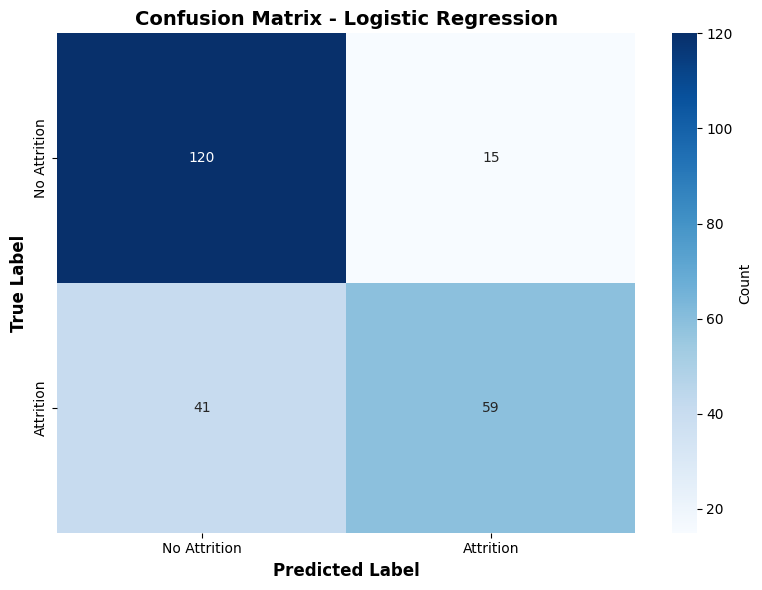

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_result = evaluate_model(lr_model, 'Logistic Regression',
                           X_train_nt_selected, X_test_nt_selected, y_train_nt, y_test_nt)
non_tree_results.append(lr_result)

K-Nearest Neighbors (Non Tree)


MODEL: K-Nearest Neighbors

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7489
   Precision: 0.7253
   Recall:    0.6600
   F1-Score:  0.6911
   CV Recall: 0.6734 (±0.0677)
   ROC-AUC:   0.8153

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.76      0.81      0.79       135
   Attrition (1)       0.73      0.66      0.69       100

        accuracy                           0.75       235
       macro avg       0.74      0.74      0.74       235
    weighted avg       0.75      0.75      0.75       235


CONFUSION MATRIX:
   True Negatives (TN):  110
   False Positives (FP): 25
   False Negatives (FN): 34
   True Positives (TP):  66


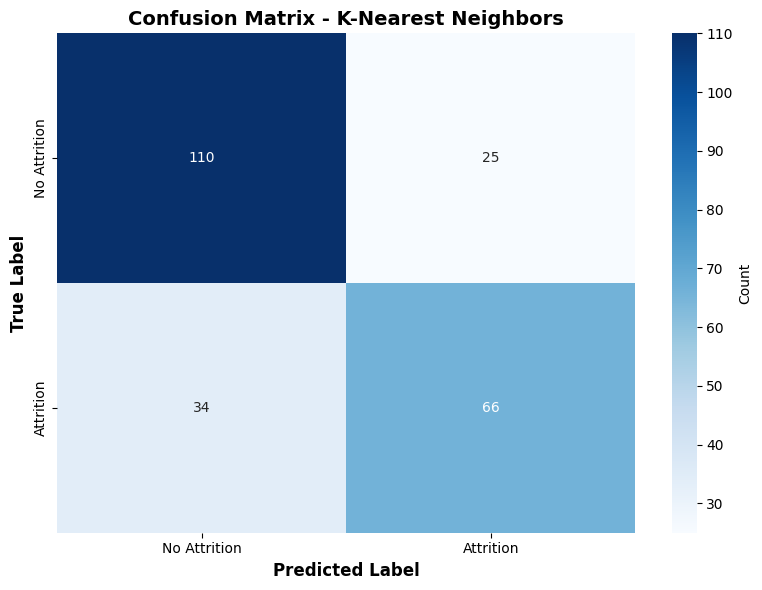

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_result = evaluate_model(knn_model, 'K-Nearest Neighbors',
                            X_train_nt_selected, X_test_nt_selected, y_train_nt, y_test_nt)
non_tree_results.append(knn_result)

Naive Bayes (Non Tree)


MODEL: Naive Bayes

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7234
   Precision: 0.6577
   Recall:    0.7300
   F1-Score:  0.6919
   CV Recall: 0.7664 (±0.0364)
   ROC-AUC:   0.7923

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.78      0.72      0.75       135
   Attrition (1)       0.66      0.73      0.69       100

        accuracy                           0.72       235
       macro avg       0.72      0.72      0.72       235
    weighted avg       0.73      0.72      0.72       235


CONFUSION MATRIX:
   True Negatives (TN):  97
   False Positives (FP): 38
   False Negatives (FN): 27
   True Positives (TP):  73


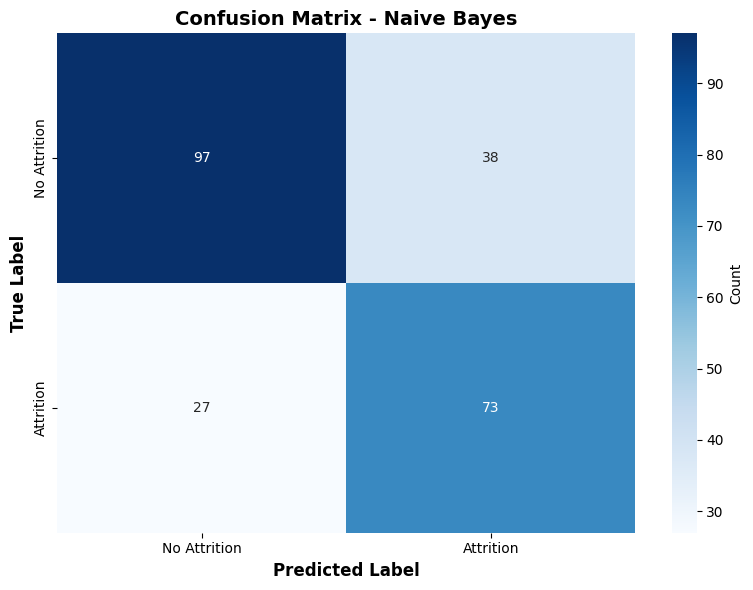

In [ ]:
nb_model = GaussianNB()
nb_result = evaluate_model(nb_model, 'Naive Bayes',
                           X_train_nt_selected, X_test_nt_selected, y_train_nt, y_test_nt)
non_tree_results.append(nb_result)

Support Vector Machine (Non Tree)


MODEL: Support Vector Machine

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7787
   Precision: 0.8243
   Recall:    0.6100
   F1-Score:  0.7011
   CV Recall: 0.7285 (±0.0675)
   ROC-AUC:   0.8654

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.76      0.90      0.82       135
   Attrition (1)       0.82      0.61      0.70       100

        accuracy                           0.78       235
       macro avg       0.79      0.76      0.76       235
    weighted avg       0.79      0.78      0.77       235


CONFUSION MATRIX:
   True Negatives (TN):  122
   False Positives (FP): 13
   False Negatives (FN): 39
   True Positives (TP):  61


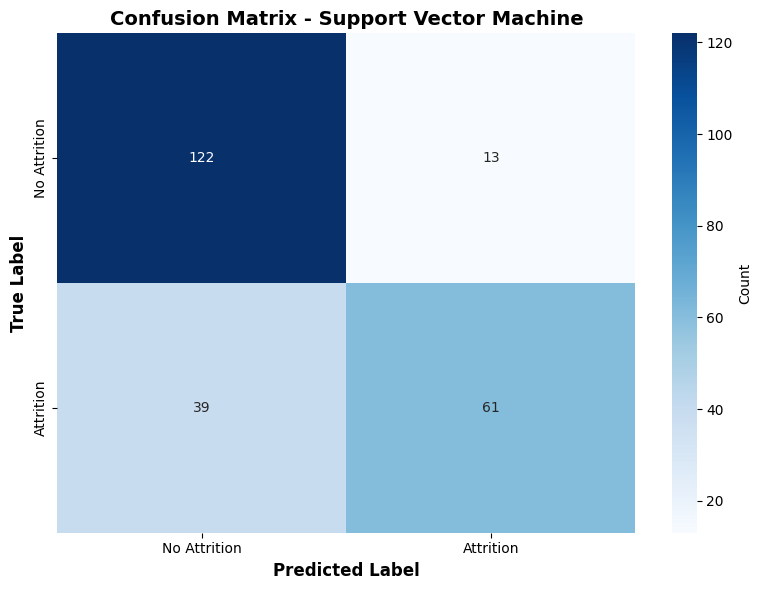

In [ ]:
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_result = evaluate_model(svm_model, 'Support Vector Machine',
                            X_train_nt_selected, X_test_nt_selected, y_train_nt, y_test_nt)
non_tree_results.append(svm_result)

Decision Tree (Tree)


MODEL: Decision Tree

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7404
   Precision: 0.7053
   Recall:    0.6700
   F1-Score:  0.6872
   CV Recall: 0.7162 (±0.0320)
   ROC-AUC:   0.7313

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.76      0.79      0.78       135
   Attrition (1)       0.71      0.67      0.69       100

        accuracy                           0.74       235
       macro avg       0.73      0.73      0.73       235
    weighted avg       0.74      0.74      0.74       235


CONFUSION MATRIX:
   True Negatives (TN):  107
   False Positives (FP): 28
   False Negatives (FN): 33
   True Positives (TP):  67


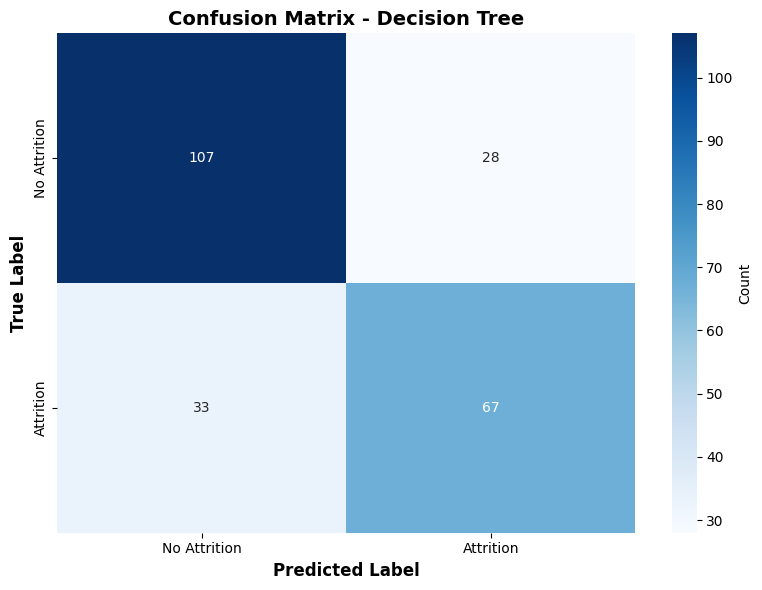

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_result = evaluate_model(dt_model, 'Decision Tree',
                           X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(dt_result)

### Ensemble Learning Models

Random Forest (Tree)


MODEL: Random Forest

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7915
   Precision: 0.8148
   Recall:    0.6600
   F1-Score:  0.7293
   CV Recall: 0.7288 (±0.0719)
   ROC-AUC:   0.8621

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.78      0.89      0.83       135
   Attrition (1)       0.81      0.66      0.73       100

        accuracy                           0.79       235
       macro avg       0.80      0.77      0.78       235
    weighted avg       0.79      0.79      0.79       235


CONFUSION MATRIX:
   True Negatives (TN):  120
   False Positives (FP): 15
   False Negatives (FN): 34
   True Positives (TP):  66


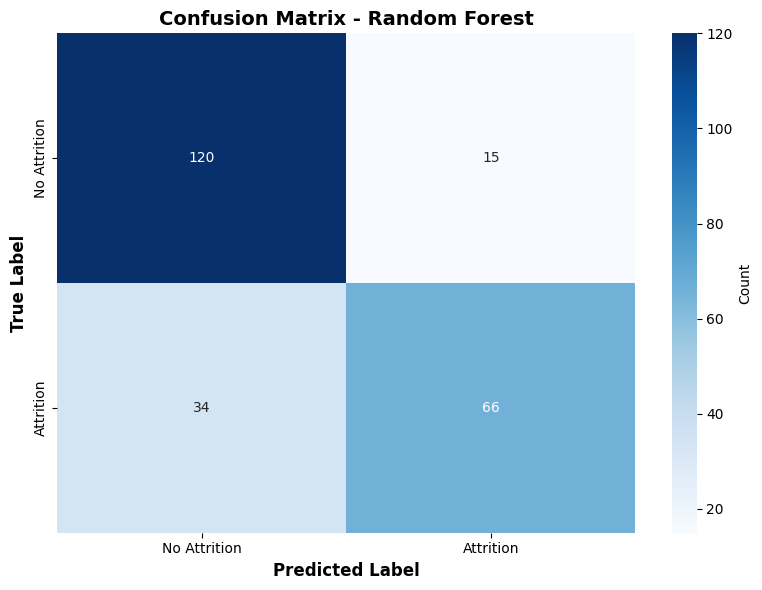

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_result = evaluate_model(rf_model, 'Random Forest',
                           X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(rf_result)

Gradient Boosting (Tree)


MODEL: Gradient Boosting

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8255
   Precision: 0.8471
   Recall:    0.7200
   F1-Score:  0.7784
   CV Recall: 0.7739 (±0.0446)
   ROC-AUC:   0.8919

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.90      0.86       135
   Attrition (1)       0.85      0.72      0.78       100

        accuracy                           0.83       235
       macro avg       0.83      0.81      0.82       235
    weighted avg       0.83      0.83      0.82       235


CONFUSION MATRIX:
   True Negatives (TN):  122
   False Positives (FP): 13
   False Negatives (FN): 28
   True Positives (TP):  72


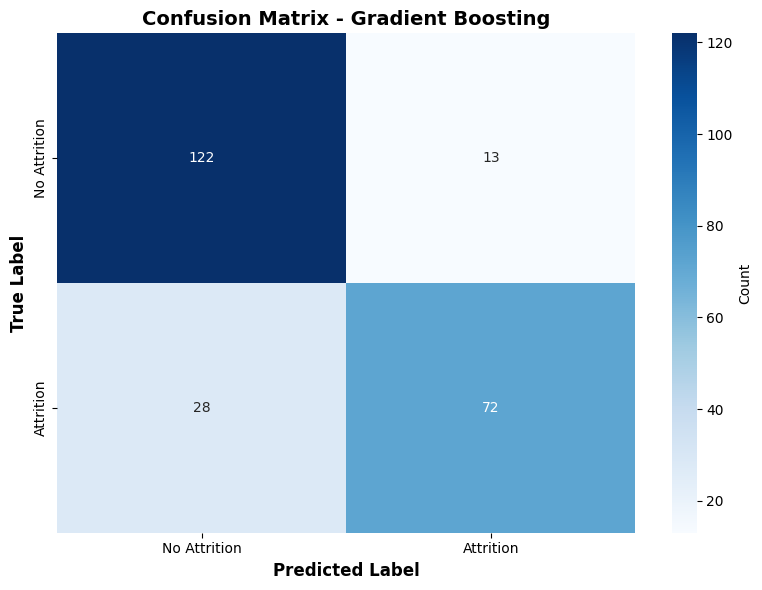

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_result = evaluate_model(gb_model, 'Gradient Boosting',
                           X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(gb_result)

AdaBoost (Tree)


MODEL: AdaBoost

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8043
   Precision: 0.8375
   Recall:    0.6700
   F1-Score:  0.7444
   CV Recall: 0.7639 (±0.0583)
   ROC-AUC:   0.8761

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.79      0.90      0.84       135
   Attrition (1)       0.84      0.67      0.74       100

        accuracy                           0.80       235
       macro avg       0.81      0.79      0.79       235
    weighted avg       0.81      0.80      0.80       235


CONFUSION MATRIX:
   True Negatives (TN):  122
   False Positives (FP): 13
   False Negatives (FN): 33
   True Positives (TP):  67


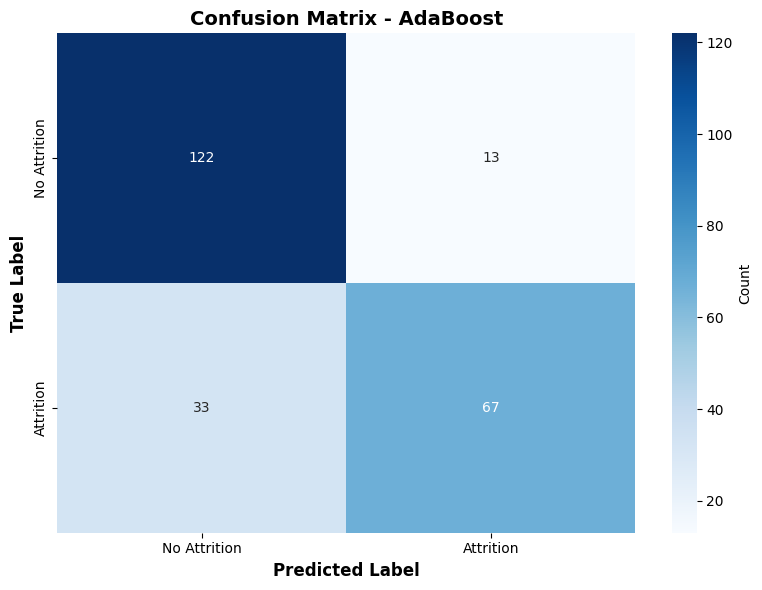

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_result = evaluate_model(ada_model, 'AdaBoost',
                            X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(ada_result)

Extra Trees (Tree)


MODEL: Extra Trees

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7787
   Precision: 0.7857
   Recall:    0.6600
   F1-Score:  0.7174
   CV Recall: 0.7236 (±0.0640)
   ROC-AUC:   0.8689

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.77      0.87      0.82       135
   Attrition (1)       0.79      0.66      0.72       100

        accuracy                           0.78       235
       macro avg       0.78      0.76      0.77       235
    weighted avg       0.78      0.78      0.78       235


CONFUSION MATRIX:
   True Negatives (TN):  117
   False Positives (FP): 18
   False Negatives (FN): 34
   True Positives (TP):  66


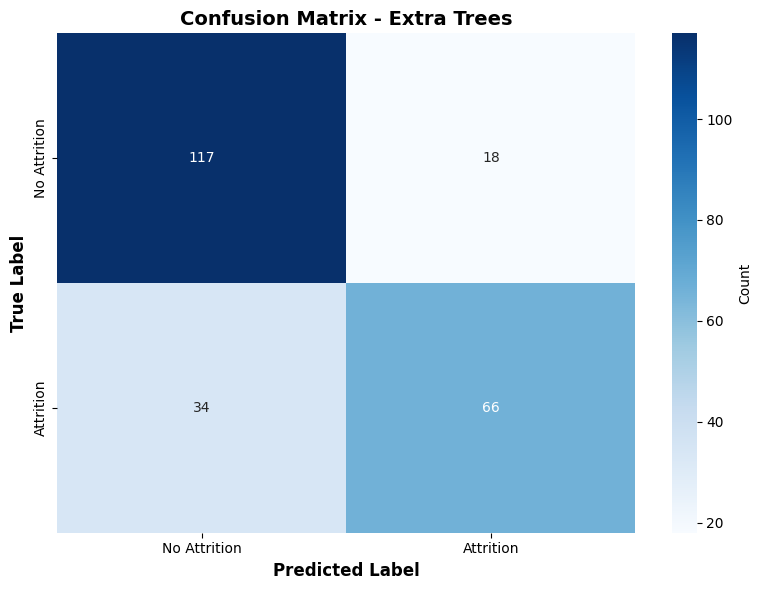

In [ ]:
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_result = evaluate_model(et_model, 'Extra Trees',
                           X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(et_result)

XGBoost (Tree)


MODEL: XGBoost

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7957
   Precision: 0.7955
   Recall:    0.7000
   F1-Score:  0.7447
   CV Recall: 0.7664 (±0.0578)
   ROC-AUC:   0.8846

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.80      0.87      0.83       135
   Attrition (1)       0.80      0.70      0.74       100

        accuracy                           0.80       235
       macro avg       0.80      0.78      0.79       235
    weighted avg       0.80      0.80      0.79       235


CONFUSION MATRIX:
   True Negatives (TN):  117
   False Positives (FP): 18
   False Negatives (FN): 30
   True Positives (TP):  70


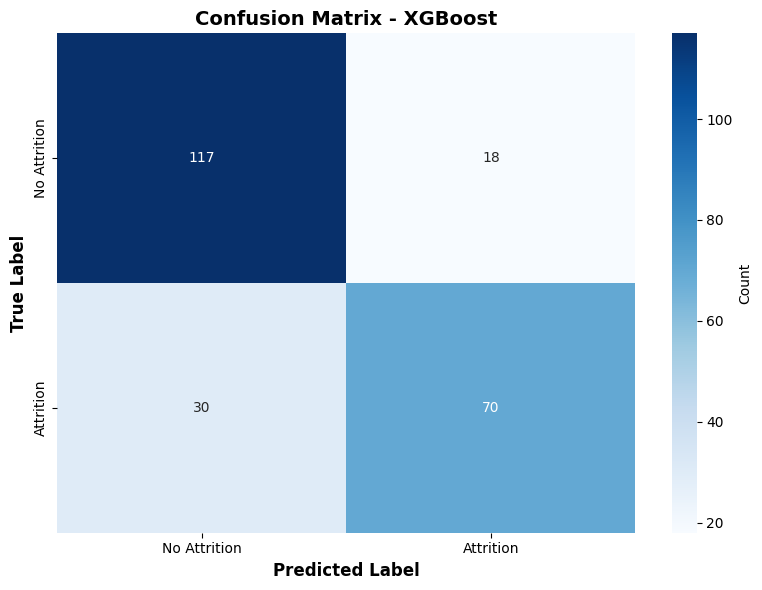

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)
xgb_result = evaluate_model(xgb_model, 'XGBoost',
                            X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(xgb_result)

CatBoost (Tree)


MODEL: CatBoost

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8043
   Precision: 0.8214
   Recall:    0.6900
   F1-Score:  0.7500
   CV Recall: 0.7615 (±0.0619)
   ROC-AUC:   0.8844

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.79      0.89      0.84       135
   Attrition (1)       0.82      0.69      0.75       100

        accuracy                           0.80       235
       macro avg       0.81      0.79      0.79       235
    weighted avg       0.81      0.80      0.80       235


CONFUSION MATRIX:
   True Negatives (TN):  120
   False Positives (FP): 15
   False Negatives (FN): 31
   True Positives (TP):  69


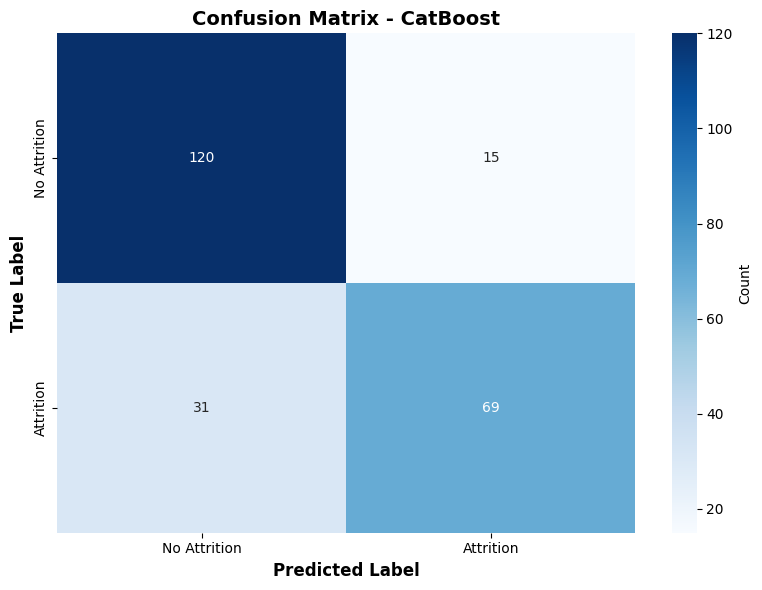

In [ ]:
cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    random_seed=42,
    verbose=0,
    early_stopping_rounds=50,
    eval_metric='F1'
)
cat_result = evaluate_model(cat_model, 'CatBoost',
                            X_train_tree, X_test_tree, y_train_tree, y_test_tree)
tree_results.append(cat_result)

### HYBRID & ENSEMBLE MODELS

Voting Classifier (Soft Voting)


MODEL: Voting Classifier

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8170
   Precision: 0.8353
   Recall:    0.7100
   F1-Score:  0.7676
   CV Recall: 0.7740 (±0.0556)
   ROC-AUC:   0.8912

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.90      0.85       135
   Attrition (1)       0.84      0.71      0.77       100

        accuracy                           0.82       235
       macro avg       0.82      0.80      0.81       235
    weighted avg       0.82      0.82      0.81       235


CONFUSION MATRIX:
   True Negatives (TN):  121
   False Positives (FP): 14
   False Negatives (FN): 29
   True Positives (TP):  71


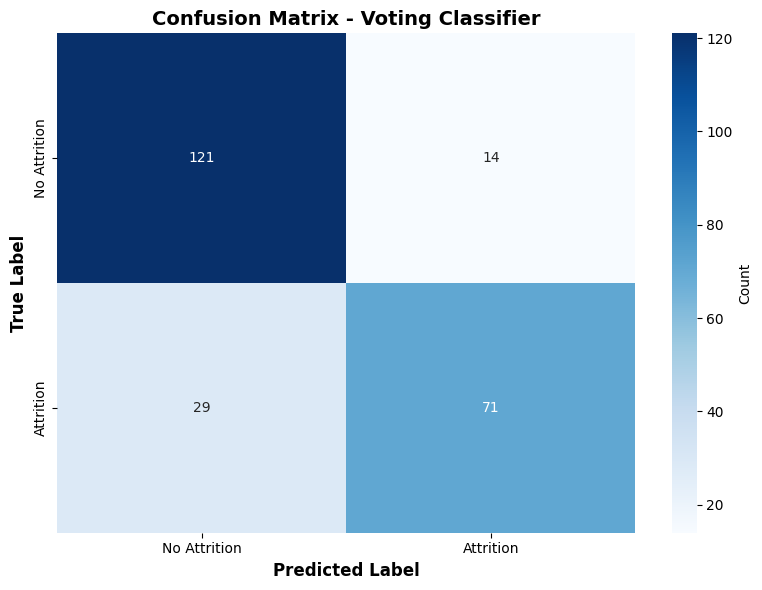

In [ ]:
voting_soft = VotingClassifier(
    estimators=[
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.05,
                             subsample=0.8, colsample_bytree=0.8,
                             random_state=42, eval_metric='logloss', n_jobs=-1)),
        ('cat', CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05,
                                   random_seed=42, verbose=0))
    ],
    voting='soft'
)

voting_result = evaluate_model(
    voting_soft,
    'Voting Classifier',
    X_train_tree,
    X_test_tree,
    y_train_tree,
    y_test_tree
)
hybrid_results.append(voting_result)

Stacking Classifier


MODEL: Stacking Classifier

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8213
   Precision: 0.8372
   Recall:    0.7200
   F1-Score:  0.7742
   CV Recall: 0.7866 (±0.0620)
   ROC-AUC:   0.8927

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.90      0.85       135
   Attrition (1)       0.84      0.72      0.77       100

        accuracy                           0.82       235
       macro avg       0.82      0.81      0.81       235
    weighted avg       0.82      0.82      0.82       235


CONFUSION MATRIX:
   True Negatives (TN):  121
   False Positives (FP): 14
   False Negatives (FN): 28
   True Positives (TP):  72


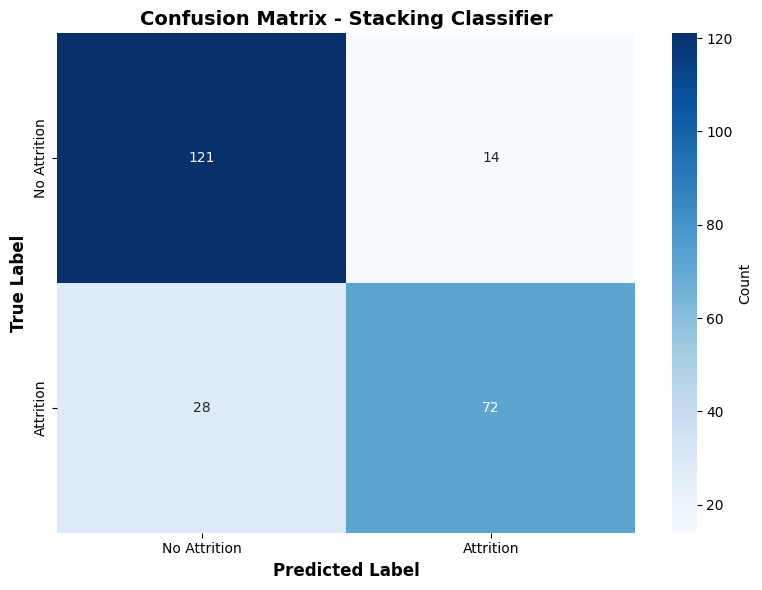

In [ ]:
stacking_model = StackingClassifier(
    estimators=[
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.05,
                             random_state=42, eval_metric='logloss', n_jobs=-1)),
        ('cat', CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05,
                                   random_seed=42, verbose=0)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5
)

stacking_result = evaluate_model(
    stacking_model,
    'Stacking Classifier',
    X_train_tree,
    X_test_tree,
    y_train_tree,
    y_test_tree
)
hybrid_results.append(stacking_result)

### HASIL

In [ ]:
all_results = non_tree_results + tree_results + hybrid_results
baseline_df  = pd.DataFrame([{k: v for k, v in r.items() if k != 'Trained Model'} for r in all_results])
baseline_df  = baseline_df.sort_values('F1-Score', ascending=False).reset_index(drop=True).round(3)

baseline_df

,Model,Accuracy,Precision,Recall,F1-Score,CV Recall Mean,CV Recall Std,ROC-AUC
0,Gradient Boosting,0.826,0.847,0.72,0.778,0.774,0.045,0.892
1,Stacking Classifier,0.821,0.837,0.72,0.774,0.787,0.062,0.893
2,Voting Classifier,0.817,0.835,0.71,0.768,0.774,0.056,0.891
3,CatBoost,0.804,0.821,0.69,0.750,0.761,0.062,0.884
4,XGBoost,0.796,0.795,0.70,0.745,0.766,0.058,0.885
5,AdaBoost,0.804,0.838,0.67,0.744,0.764,0.058,0.876
6,Random Forest,0.791,0.815,0.66,0.729,0.729,0.072,0.862
7,Extra Trees,0.779,0.786,0.66,0.717,0.724,0.064,0.869
8,Support Vector Machine,0.779,0.824,0.61,0.701,0.729,0.067,0.865
9,Naive Bayes,0.723,0.658,0.73,0.692,0.766,0.036,0.792


In [ ]:
top_5_df = baseline_df.head(5).copy()
print("\n" + "="*80)
print("TOP 5 MODELS SELECTED FOR TUNING:")
print("="*80)
for idx, row in top_5_df.iterrows():
    print(f"{idx+1}. {row['Model']:<40} | Recall={row['Recall']:.4f} | F1={row['F1-Score']:.4f}")


TOP 5 MODELS SELECTED FOR TUNING:
1. Gradient Boosting                        | Recall=0.7200 | F1=0.7780
2. Stacking Classifier                      | Recall=0.7200 | F1=0.7740
3. Voting Classifier                        | Recall=0.7100 | F1=0.7680
4. CatBoost                                 | Recall=0.6900 | F1=0.7500
5. XGBoost                                  | Recall=0.7000 | F1=0.7450


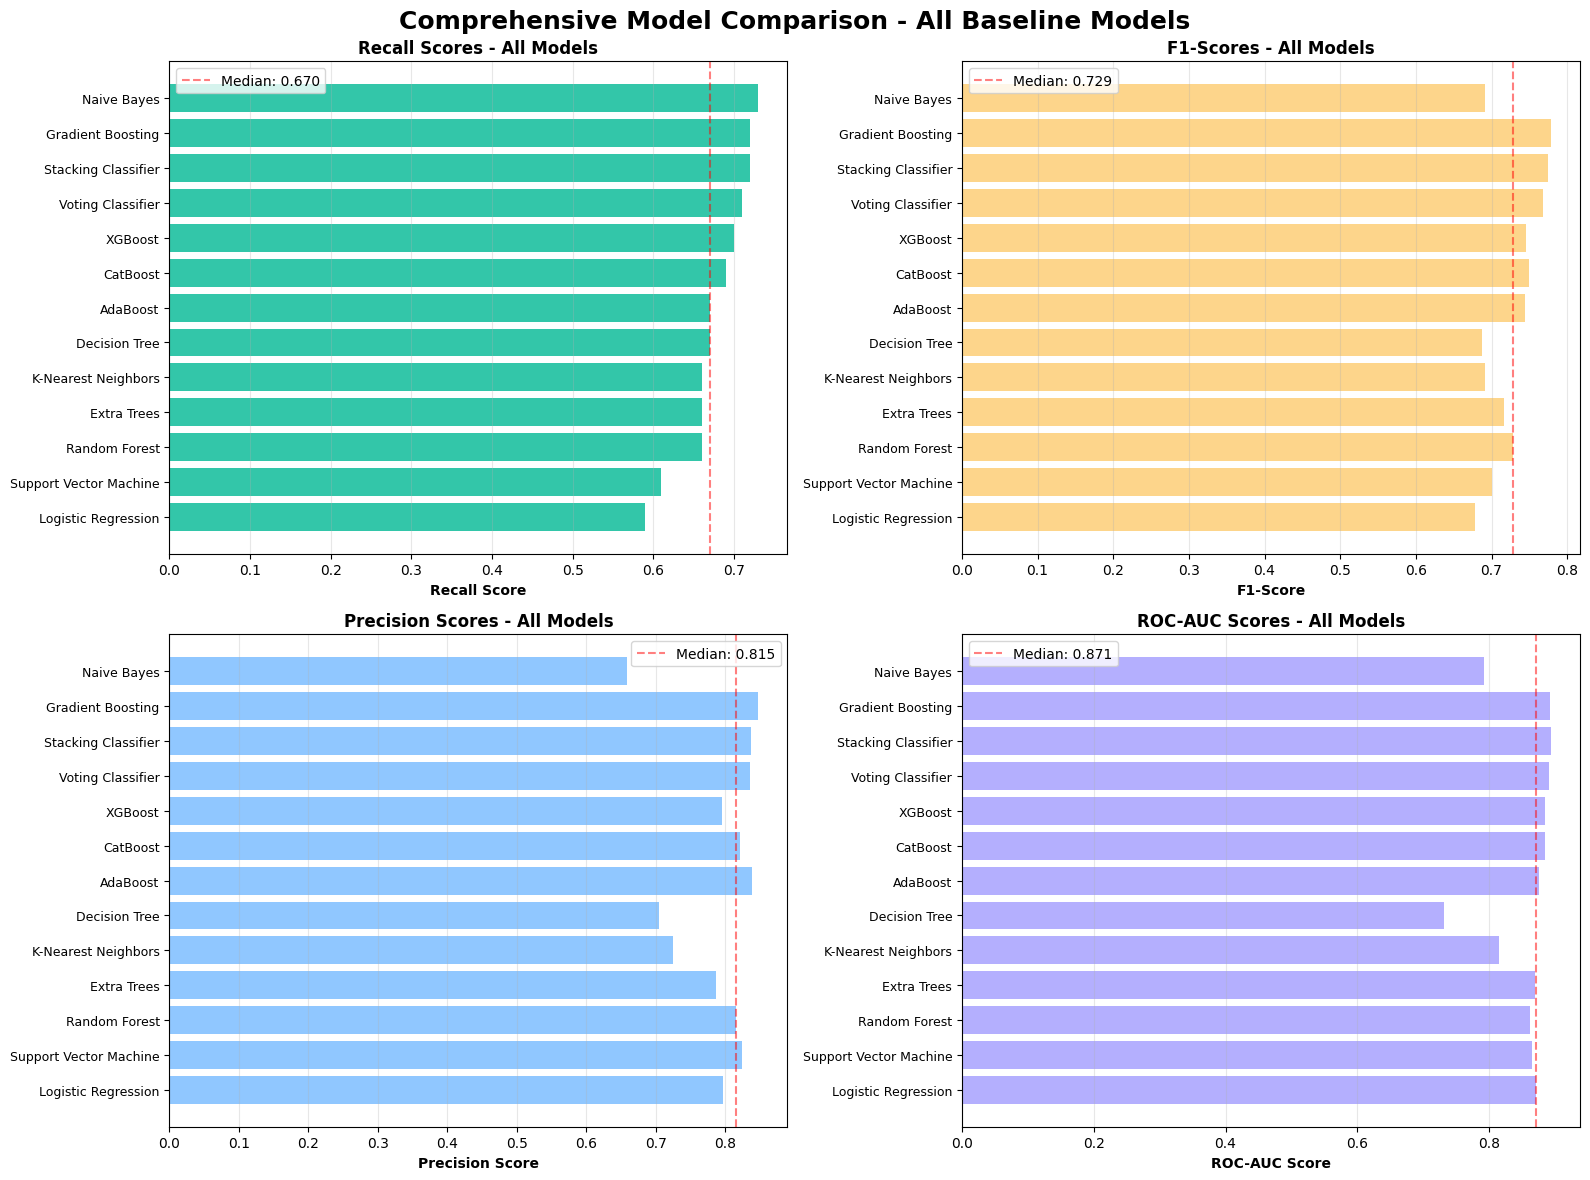

In [ ]:
# 1. Compare ALL baseline models
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comprehensive Model Comparison - All Baseline Models',
             fontsize=18, fontweight='bold')

# Sort by recall for better visualization
plot_df = baseline_df.sort_values('Recall', ascending=True)

# Recall comparison
axes[0, 0].barh(range(len(plot_df)), plot_df['Recall'], color='#00b894', alpha=0.8)
axes[0, 0].set_yticks(range(len(plot_df)))
axes[0, 0].set_yticklabels(plot_df['Model'], fontsize=9)
axes[0, 0].set_xlabel('Recall Score', fontweight='bold')
axes[0, 0].set_title('Recall Scores - All Models', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].axvline(x=plot_df['Recall'].median(), color='red',
                   linestyle='--', alpha=0.5, label=f'Median: {plot_df["Recall"].median():.3f}')
axes[0, 0].legend()

# F1-Score comparison
axes[0, 1].barh(range(len(plot_df)), plot_df['F1-Score'], color='#fdcb6e', alpha=0.8)
axes[0, 1].set_yticks(range(len(plot_df)))
axes[0, 1].set_yticklabels(plot_df['Model'], fontsize=9)
axes[0, 1].set_xlabel('F1-Score', fontweight='bold')
axes[0, 1].set_title('F1-Scores - All Models', fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].axvline(x=plot_df['F1-Score'].median(), color='red',
                   linestyle='--', alpha=0.5, label=f'Median: {plot_df["F1-Score"].median():.3f}')
axes[0, 1].legend()

# Precision comparison
axes[1, 0].barh(range(len(plot_df)), plot_df['Precision'], color='#74b9ff', alpha=0.8)
axes[1, 0].set_yticks(range(len(plot_df)))
axes[1, 0].set_yticklabels(plot_df['Model'], fontsize=9)
axes[1, 0].set_xlabel('Precision Score', fontweight='bold')
axes[1, 0].set_title('Precision Scores - All Models', fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].axvline(x=plot_df['Precision'].median(), color='red',
                   linestyle='--', alpha=0.5, label=f'Median: {plot_df["Precision"].median():.3f}')
axes[1, 0].legend()

# ROC-AUC comparison
axes[1, 1].barh(range(len(plot_df)), plot_df['ROC-AUC'], color='#a29bfe', alpha=0.8)
axes[1, 1].set_yticks(range(len(plot_df)))
axes[1, 1].set_yticklabels(plot_df['Model'], fontsize=9)
axes[1, 1].set_xlabel('ROC-AUC Score', fontweight='bold')
axes[1, 1].set_title('ROC-AUC Scores - All Models', fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)
axes[1, 1].axvline(x=plot_df['ROC-AUC'].median(), color='red',
                   linestyle='--', alpha=0.5, label=f'Median: {plot_df["ROC-AUC"].median():.3f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

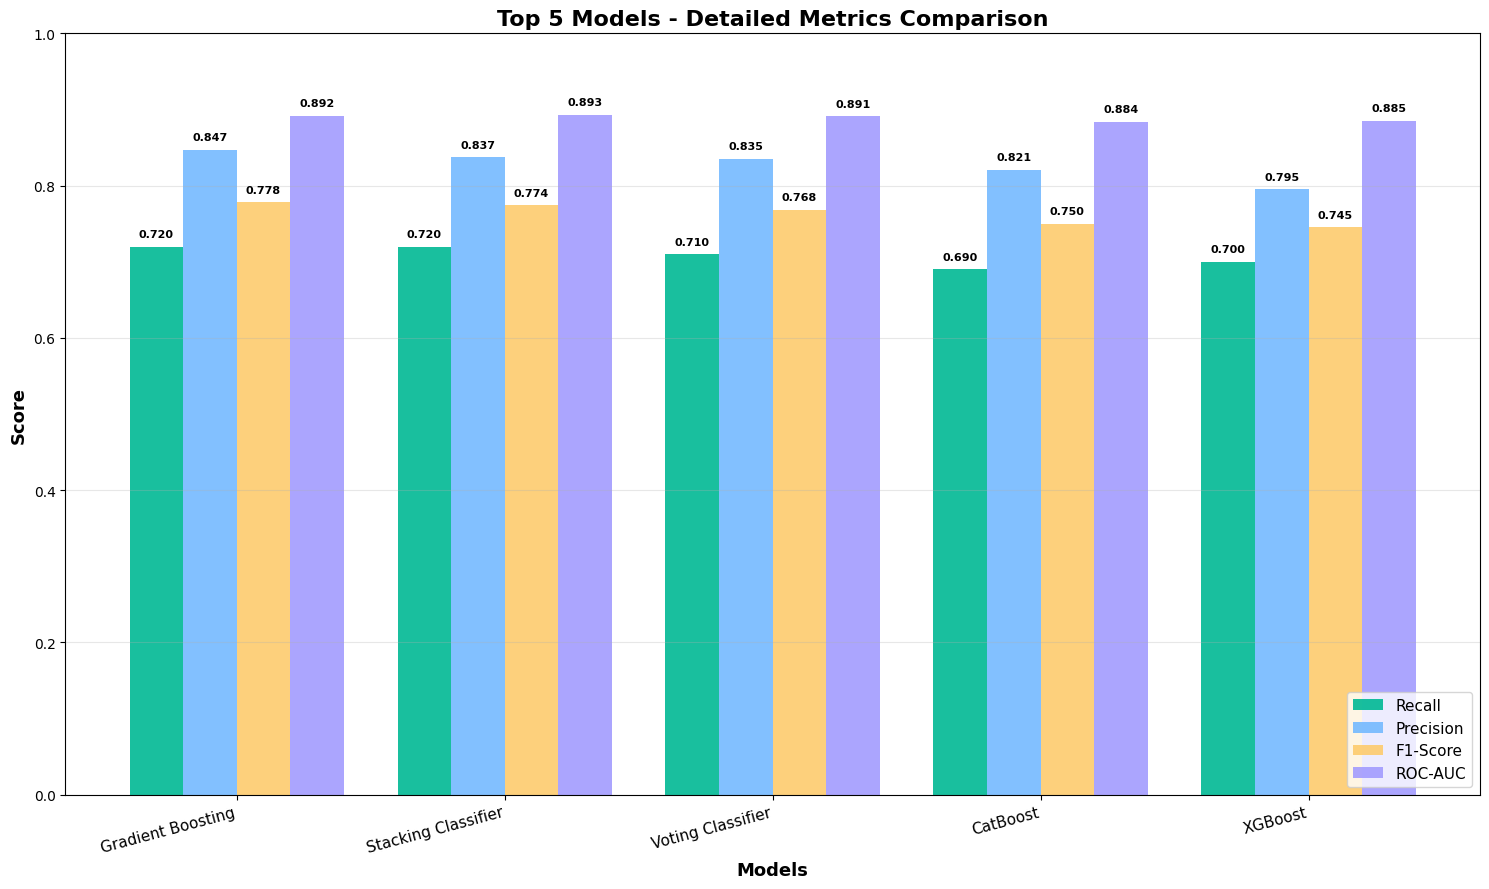

In [ ]:
# 2. Top 4 models detailed comparison
fig, ax = plt.subplots(figsize=(15, 9))

top_5_plot = baseline_df.head(5)
metrics = ['Recall', 'Precision', 'F1-Score', 'ROC-AUC']
x = np.arange(len(top_5_plot))
width = 0.2

colors = ['#00b894', '#74b9ff', '#fdcb6e', '#a29bfe']

for i, metric in enumerate(metrics):
    values = top_5_plot[metric].values
    ax.bar(x + i*width, values, width, label=metric, color=colors[i], alpha=0.9)

    # Add value labels on bars
    for j, v in enumerate(values):
        ax.text(x[j] + i*width, v + 0.01, f'{v:.3f}',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.set_xlabel('Models', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Top 5 Models - Detailed Metrics Comparison',
             fontsize=16, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(top_5_plot['Model'], rotation=15, ha='right', fontsize=11)
ax.legend(loc='lower right', fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

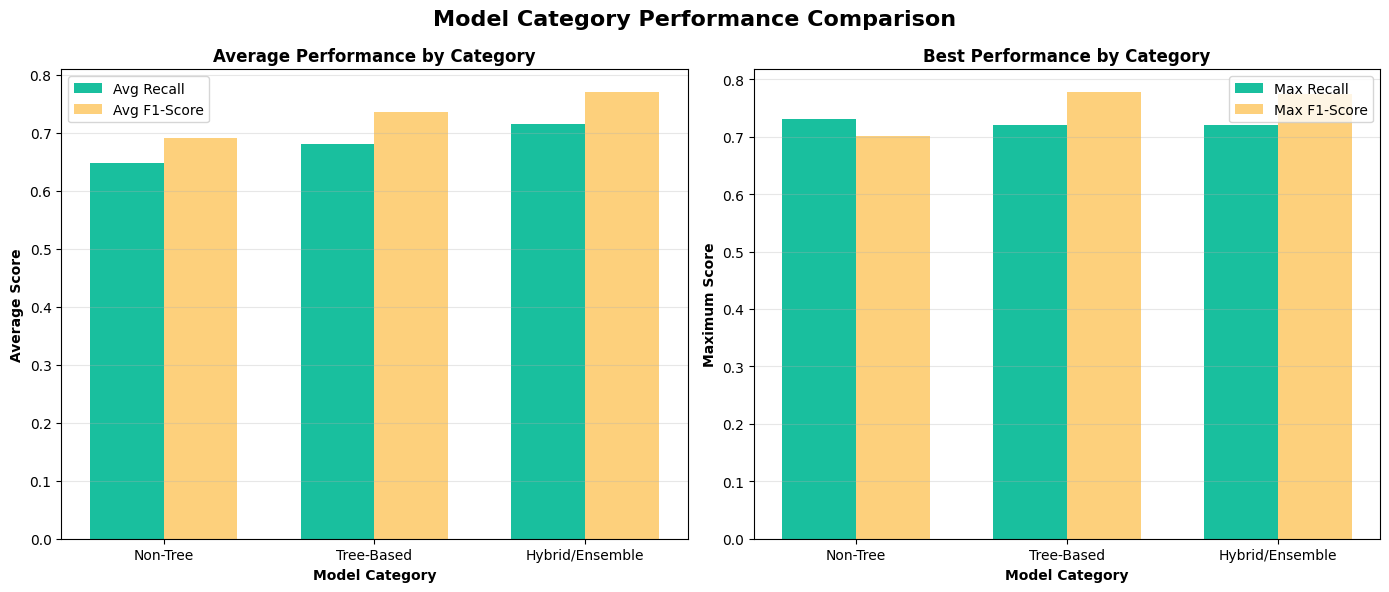

In [ ]:
# 3. Model category comparison (Non-Tree vs Tree vs Hybrid)
category_data = {
    'Non-Tree': [r for r in all_results if r in non_tree_results],
    'Tree-Based': [r for r in all_results if r in tree_results],
    'Hybrid/Ensemble': [r for r in all_results if r in hybrid_results]
}

category_stats = []
for cat_name, models in category_data.items():
    if models:
        recalls = [m['Recall'] for m in models]
        f1s = [m['F1-Score'] for m in models]
        category_stats.append({
            'Category': cat_name,
            'Avg Recall': np.mean(recalls),
            'Avg F1': np.mean(f1s),
            'Max Recall': np.max(recalls),
            'Max F1': np.max(f1s),
            'Count': len(models)
        })

cat_df = pd.DataFrame(category_stats)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Model Category Performance Comparison', fontsize=16, fontweight='bold')

x_cat = np.arange(len(cat_df))
width = 0.35

# Average scores
axes[0].bar(x_cat - width/2, cat_df['Avg Recall'], width,
           label='Avg Recall', color='#00b894', alpha=0.9)
axes[0].bar(x_cat + width/2, cat_df['Avg F1'], width,
           label='Avg F1-Score', color='#fdcb6e', alpha=0.9)
axes[0].set_xlabel('Model Category', fontweight='bold')
axes[0].set_ylabel('Average Score', fontweight='bold')
axes[0].set_title('Average Performance by Category', fontweight='bold')
axes[0].set_xticks(x_cat)
axes[0].set_xticklabels(cat_df['Category'])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Max scores
axes[1].bar(x_cat - width/2, cat_df['Max Recall'], width,
           label='Max Recall', color='#00b894', alpha=0.9)
axes[1].bar(x_cat + width/2, cat_df['Max F1'], width,
           label='Max F1-Score', color='#fdcb6e', alpha=0.9)
axes[1].set_xlabel('Model Category', fontweight='bold')
axes[1].set_ylabel('Maximum Score', fontweight='bold')
axes[1].set_title('Best Performance by Category', fontweight='bold')
axes[1].set_xticks(x_cat)
axes[1].set_xticklabels(cat_df['Category'])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### HYPERPARAMETER TUNING

Tuning Progress:   0%|          | 0/5 [00:00<?, ?it/s]


TUNING: Gradient Boosting
Fitting 5 folds for each of 162 candidates, totalling 810 fits

✓ Best params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}
✓ Best CV Recall: 0.7914

MODEL: Gradient Boosting (Tuned)

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8255
   Precision: 0.8642
   Recall:    0.7000
   F1-Score:  0.7735
   CV Recall: 0.7914 (±0.0480)
   ROC-AUC:   0.8941

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.92      0.86       135
   Attrition (1)       0.86      0.70      0.77       100

        accuracy                           0.83       235
       macro avg       0.83      0.81      0.82       235
    weighted avg       0.83      0.83      0.82       235


CONFUSION MATRIX:
   True Negatives (TN):  124
   False Positives (FP): 11
   False Negatives (FN): 30
   True Positives (TP):  70


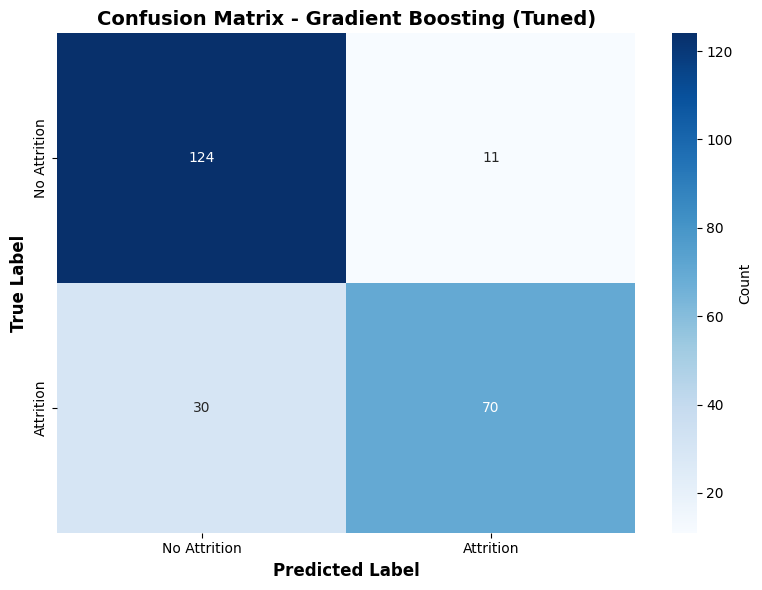


TUNING: Stacking Classifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



✓ Best params: {'xgb__n_estimators': 500, 'gb__n_estimators': 200, 'gb__learning_rate': 0.1, 'cat__iterations': 500}
✓ Best CV Recall: 0.7815

MODEL: Stacking Classifier (Tuned)

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8213
   Precision: 0.8452
   Recall:    0.7100
   F1-Score:  0.7717
   CV Recall: 0.7815 (±0.0521)
   ROC-AUC:   0.8949

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.90      0.85       135
   Attrition (1)       0.85      0.71      0.77       100

        accuracy                           0.82       235
       macro avg       0.83      0.81      0.81       235
    weighted avg       0.82      0.82      0.82       235


CONFUSION MATRIX:
   True Negatives (TN):  122
   False Positives (FP): 13
   False Negatives (FN): 29
   True Positives (TP):  71


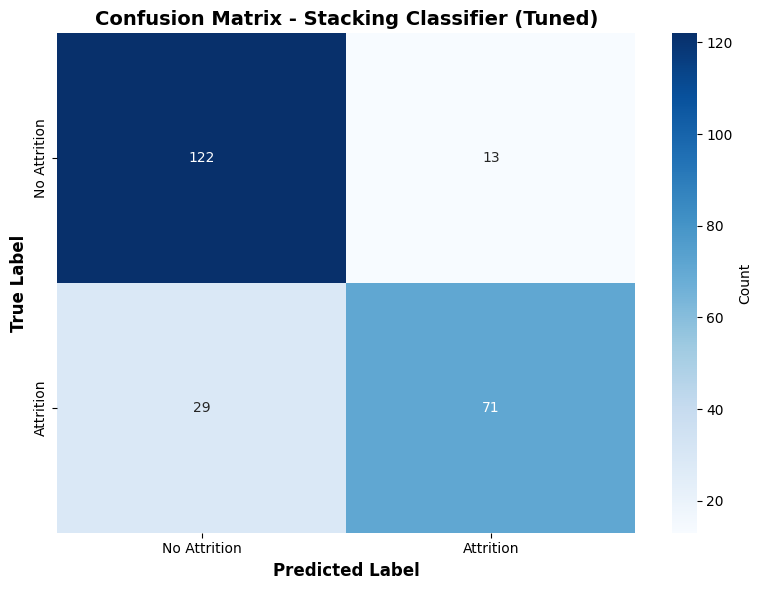


TUNING: Voting Classifier
Fitting 5 folds for each of 50 candidates, totalling 250 fits

✓ Best params: {'xgb__n_estimators': 300, 'xgb__max_depth': 5, 'gb__n_estimators': 200, 'gb__max_depth': 4, 'gb__learning_rate': 0.05, 'cat__iterations': 400}
✓ Best CV Recall: 0.7865

MODEL: Voting Classifier (Tuned)

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8255
   Precision: 0.8471
   Recall:    0.7200
   F1-Score:  0.7784
   CV Recall: 0.7865 (±0.0541)
   ROC-AUC:   0.8938

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.90      0.86       135
   Attrition (1)       0.85      0.72      0.78       100

        accuracy                           0.83       235
       macro avg       0.83      0.81      0.82       235
    weighted avg       0.83      0.83      0.82       235


CONFUSION MATRIX:
   True Negatives (TN):  122
   False Positives (FP): 13
   False Negatives (FN): 28
   True Positive

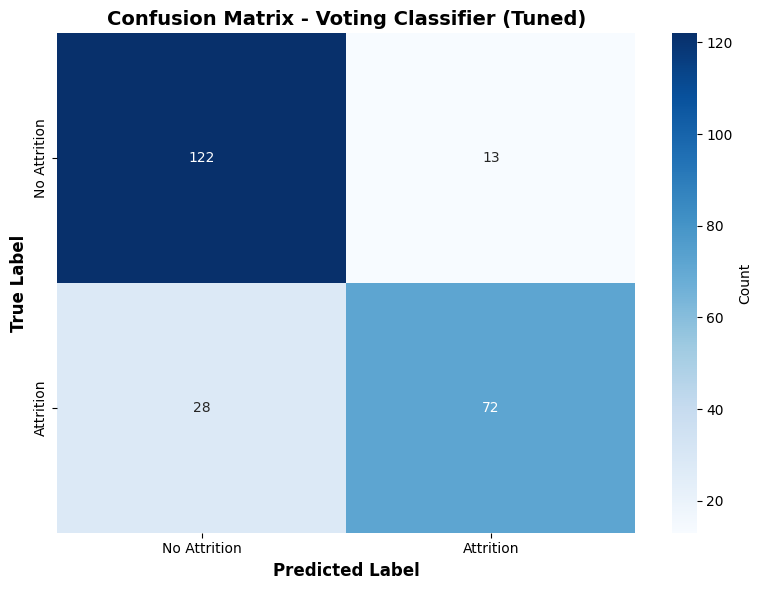


TUNING: CatBoost
Fitting 5 folds for each of 60 candidates, totalling 300 fits

✓ Best params: {'bagging_temperature': np.float64(0.7790044150731674), 'depth': 6, 'iterations': 589, 'l2_leaf_reg': 6, 'learning_rate': np.float64(0.12422111536716163)}
✓ Best CV Recall: 0.7816

MODEL: CatBoost (Tuned)

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.7830
   Precision: 0.8025
   Recall:    0.6500
   F1-Score:  0.7182
   CV Recall: 0.7816 (±0.0581)
   ROC-AUC:   0.8717

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.77      0.88      0.82       135
   Attrition (1)       0.80      0.65      0.72       100

        accuracy                           0.78       235
       macro avg       0.79      0.77      0.77       235
    weighted avg       0.79      0.78      0.78       235


CONFUSION MATRIX:
   True Negatives (TN):  119
   False Positives (FP): 16
   False Negatives (FN): 35
   True Positives (TP):

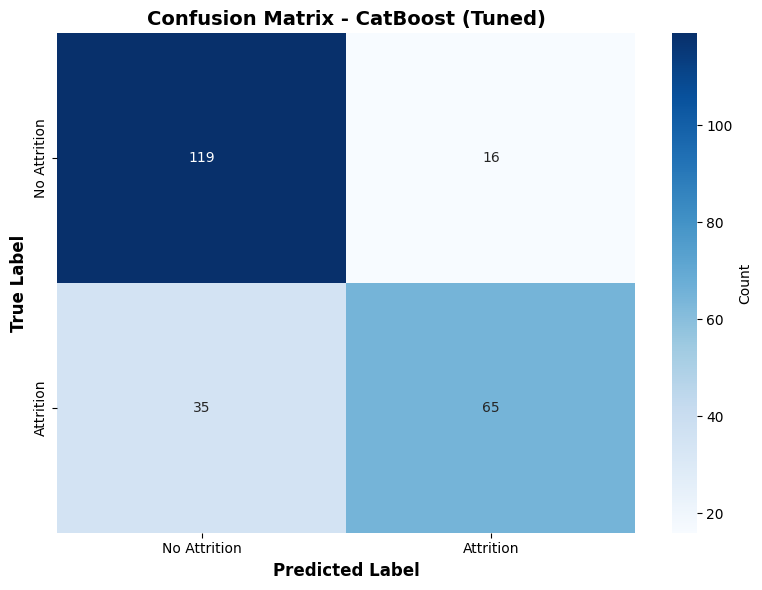


TUNING: XGBoost
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✓ Best params: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
✓ Best CV Recall: 0.7866

MODEL: XGBoost (Tuned)

Training model...
Training completed!

PERFORMANCE METRICS:
   Accuracy:  0.8128
   Precision: 0.8111
   Recall:    0.7300
   F1-Score:  0.7684
   CV Recall: 0.7866 (±0.0590)
   ROC-AUC:   0.8944

CLASSIFICATION REPORT:
                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.87      0.84       135
   Attrition (1)       0.81      0.73      0.77       100

        accuracy                           0.81       235
       macro avg       0.81      0.80      0.81       235
    weighted avg       0.81      0.81      0.81       235


CONFUSION MATRIX:
   True Negatives (TN):  118
   False Positives (FP): 17
   False Negatives (FN): 27
   True Positives (TP):  73


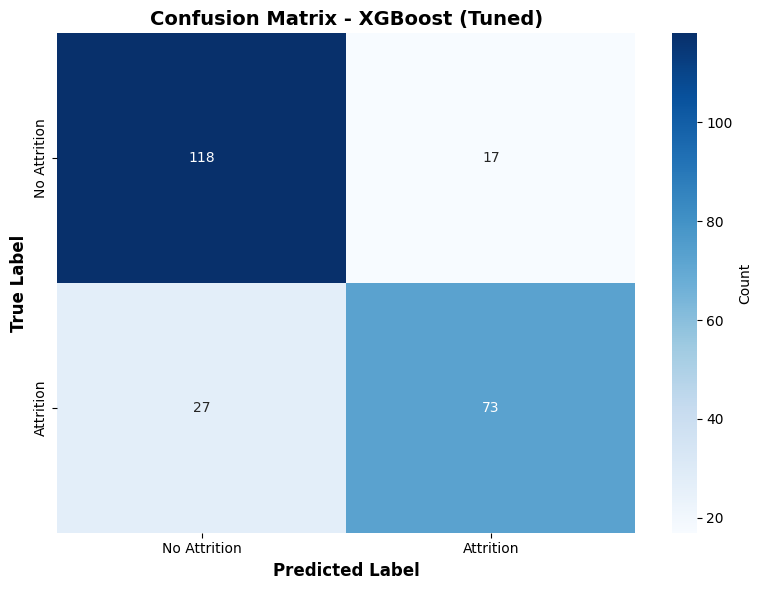

In [ ]:
tuned_results = []

# Extract model names from top 4
top_5_names = top_5_df['Model'].tolist()

# Loop through top 4 and tune
for model_name in tqdm(top_5_names, desc="Tuning Progress"):

    print(f"\n{'='*70}")
    print(f"TUNING: {model_name}")
    print(f"{'='*70}")

    # Determine data and model based on name
    if 'Naive Bayes' in model_name:
        model = GaussianNB()
        X_tr, X_te, y_tr, y_te = X_train_nt_selected, X_test_nt_selected, y_train_nt, y_test_nt
        param_grid = {}
        search_type = 'none'

    elif 'Gradient Boosting' in model_name:
        model = GradientBoostingClassifier(random_state=42)
        X_tr, X_te, y_tr, y_te = X_train_tree, X_test_tree, y_train_tree, y_test_tree
        param_grid = {
            'n_estimators': [200, 300, 400],
            'learning_rate': [0.05, 0.08, 0.1],
            'max_depth': [3, 4, 5],
            'subsample': [0.8, 0.9, 1.0],
            'min_samples_split': [2, 5]
        }
        search_type = 'grid'

    elif 'XGBoost' in model_name:
        model = XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)
        X_tr, X_te, y_tr, y_te = X_train_tree, X_test_tree, y_train_tree, y_test_tree
        param_grid = {
            'n_estimators': [300, 500],
            'max_depth': [4, 5, 6],
            'learning_rate': [0.03, 0.05, 0.1],
            'subsample': [0.8, 0.9],
            'colsample_bytree': [0.8, 0.9],
            'gamma': [0, 0.1, 0.2]
        }
        search_type = 'grid'

    elif 'CatBoost' in model_name:
        model = CatBoostClassifier(random_seed=42, verbose=0,
                                   early_stopping_rounds=100, eval_metric='F1')
        X_tr, X_te, y_tr, y_te = X_train_tree, X_test_tree, y_train_tree, y_test_tree
        param_grid = {
            'iterations': randint(400, 800),
            'depth': randint(4, 8),
            'learning_rate': uniform(0.03, 0.12),
            'l2_leaf_reg': randint(1, 7),
            'bagging_temperature': uniform(0, 0.8)
        }
        search_type = 'randomized'

    elif 'Voting' in model_name:
        model = VotingClassifier(
            estimators=[
                ('gb', GradientBoostingClassifier(random_state=42)),
                ('xgb', XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)),
                ('cat', CatBoostClassifier(random_seed=42, verbose=0))
            ],
            voting='soft'
        )
        X_tr, X_te, y_tr, y_te = X_train_tree, X_test_tree, y_train_tree, y_test_tree
        param_grid = {
            'gb__n_estimators': [200, 300],
            'gb__learning_rate': [0.05, 0.1],
            'gb__max_depth': [3, 4],
            'xgb__n_estimators': [300, 500],
            'xgb__max_depth': [5, 6],
            'cat__iterations': [400, 500]
        }
        search_type = 'randomized'

    elif 'Stacking' in model_name:
        model = StackingClassifier(
            estimators=[
                ('gb', GradientBoostingClassifier(random_state=42)),
                ('xgb', XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)),
                ('cat', CatBoostClassifier(random_seed=42, verbose=0))
            ],
            final_estimator=LogisticRegression(max_iter=1000, random_state=42),
            cv=5
        )
        X_tr, X_te, y_tr, y_te = X_train_tree, X_test_tree, y_train_tree, y_test_tree
        param_grid = {
            'gb__n_estimators': [200, 300],
            'gb__learning_rate': [0.05, 0.1],
            'xgb__n_estimators': [300, 500],
            'cat__iterations': [400, 500]
        }
        search_type = 'randomized'

    else:
        print(f"⚠️ Model {model_name} not configured for tuning, skipping...")
        continue

    # Perform tuning
    if search_type == 'none':
        best_model = model.fit(X_tr, y_tr)
        print("✓ No tuning needed")

    elif search_type == 'randomized':
        n_iter = 60 if 'CatBoost' in model_name else 50
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=n_iter,
            cv=5,
            scoring='recall',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        search.fit(X_tr, y_tr)
        best_model = search.best_estimator_
        print(f"\n✓ Best params: {search.best_params_}")
        print(f"✓ Best CV Recall: {search.best_score_:.4f}")

    else:  # grid
        search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=5,
            scoring='recall',
            n_jobs=-1,
            verbose=1
        )
        search.fit(X_tr, y_tr)
        best_model = search.best_estimator_
        print(f"\n✓ Best params: {search.best_params_}")
        print(f"✓ Best CV Recall: {search.best_score_:.4f}")

    # Evaluate tuned model
    result = evaluate_model(best_model, f"{model_name} (Tuned)", X_tr, X_te, y_tr, y_te)
    tuned_results.append(result)

In [ ]:
comparison_rows = []

for model_name in top_5_names:
    # Find baseline
    baseline_row = baseline_df[baseline_df['Model'] == model_name]
    if baseline_row.empty:
        continue

    baseline_row = baseline_row.iloc[0]

    # Add baseline
    comparison_rows.append({
        'Model': model_name,
        'Version': 'Baseline',
        'Recall': baseline_row['Recall'],
        'Precision': baseline_row['Precision'],
        'F1-Score': baseline_row['F1-Score'],
        'ROC-AUC': baseline_row['ROC-AUC']
    })

    # Find tuned
    tuned_row = next((r for r in tuned_results if model_name in r['Model']), None)
    if tuned_row:
        comparison_rows.append({
            'Model': model_name,
            'Version': 'Tuned',
            'Recall': tuned_row['Recall'],
            'Precision': tuned_row['Precision'],
            'F1-Score': tuned_row['F1-Score'],
            'ROC-AUC': tuned_row['ROC-AUC']
        })

comparison_df = pd.DataFrame(comparison_rows).round(4)
comparison_df

,Model,Version,Recall,Precision,F1-Score,ROC-AUC
0,Gradient Boosting,Baseline,0.72,0.8470,0.7780,0.8920
1,Gradient Boosting,Tuned,0.70,0.8642,0.7735,0.8941
2,Stacking Classifier,Baseline,0.72,0.8370,0.7740,0.8930
3,Stacking Classifier,Tuned,0.71,0.8452,0.7717,0.8949
4,Voting Classifier,Baseline,0.71,0.8350,0.7680,0.8910
5,Voting Classifier,Tuned,0.72,0.8471,0.7784,0.8938
6,CatBoost,Baseline,0.69,0.8210,0.7500,0.8840
7,CatBoost,Tuned,0.65,0.8025,0.7182,0.8717
8,XGBoost,Baseline,0.70,0.7950,0.7450,0.8850
9,XGBoost,Tuned,0.73,0.8111,0.7684,0.8944


In [ ]:
for model_name in top_5_names:
    baseline_rows = comparison_df[(comparison_df['Model'] == model_name) &
                                 (comparison_df['Version'] == 'Baseline')]
    tuned_rows = comparison_df[(comparison_df['Model'] == model_name) &
                              (comparison_df['Version'] == 'Tuned')]

    if baseline_rows.empty or tuned_rows.empty:
        continue

    baseline_vals = baseline_rows.iloc[0]
    tuned_vals = tuned_rows.iloc[0]

    recall_change = tuned_vals['Recall'] - baseline_vals['Recall']
    f1_change = tuned_vals['F1-Score'] - baseline_vals['F1-Score']

    recall_pct = (recall_change / baseline_vals['Recall'] * 100) if baseline_vals['Recall'] > 0 else 0
    f1_pct = (f1_change / baseline_vals['F1-Score'] * 100) if baseline_vals['F1-Score'] > 0 else 0

    print(f"\n{model_name}:")
    print(f"  Recall:    {baseline_vals['Recall']:.4f} → {tuned_vals['Recall']:.4f}  "
          f"({recall_change:+.4f}, {recall_pct:+.2f}%)")
    print(f"  F1-Score:  {baseline_vals['F1-Score']:.4f} → {tuned_vals['F1-Score']:.4f}  "
          f"({f1_change:+.4f}, {f1_pct:+.2f}%)")



Gradient Boosting:
  Recall:    0.7200 → 0.7000  (-0.0200, -2.78%)
  F1-Score:  0.7780 → 0.7735  (-0.0045, -0.58%)

Stacking Classifier:
  Recall:    0.7200 → 0.7100  (-0.0100, -1.39%)
  F1-Score:  0.7740 → 0.7717  (-0.0023, -0.30%)

Voting Classifier:
  Recall:    0.7100 → 0.7200  (+0.0100, +1.41%)
  F1-Score:  0.7680 → 0.7784  (+0.0104, +1.35%)

CatBoost:
  Recall:    0.6900 → 0.6500  (-0.0400, -5.80%)
  F1-Score:  0.7500 → 0.7182  (-0.0318, -4.24%)

XGBoost:
  Recall:    0.7000 → 0.7300  (+0.0300, +4.29%)
  F1-Score:  0.7450 → 0.7684  (+0.0234, +3.14%)


In [ ]:
tuned_df = pd.DataFrame([{k: v for k, v in r.items() if k != 'Trained Model'}
                         for r in tuned_results])
tuned_df = tuned_df.sort_values('Recall', ascending=False)

best_model_name = tuned_df.iloc[0]['Model']
best_model_obj = next(r['Trained Model'] for r in tuned_results
                     if r['Model'] == best_model_name)

# Determine correct test data
if any(x in best_model_name for x in ['Naive', 'Logistic', 'SVM', 'KNN']):
    X_test_final = X_test_nt_selected
    y_test_final = y_test_nt
else:
    X_test_final = X_test_tree
    y_test_final = y_test_tree

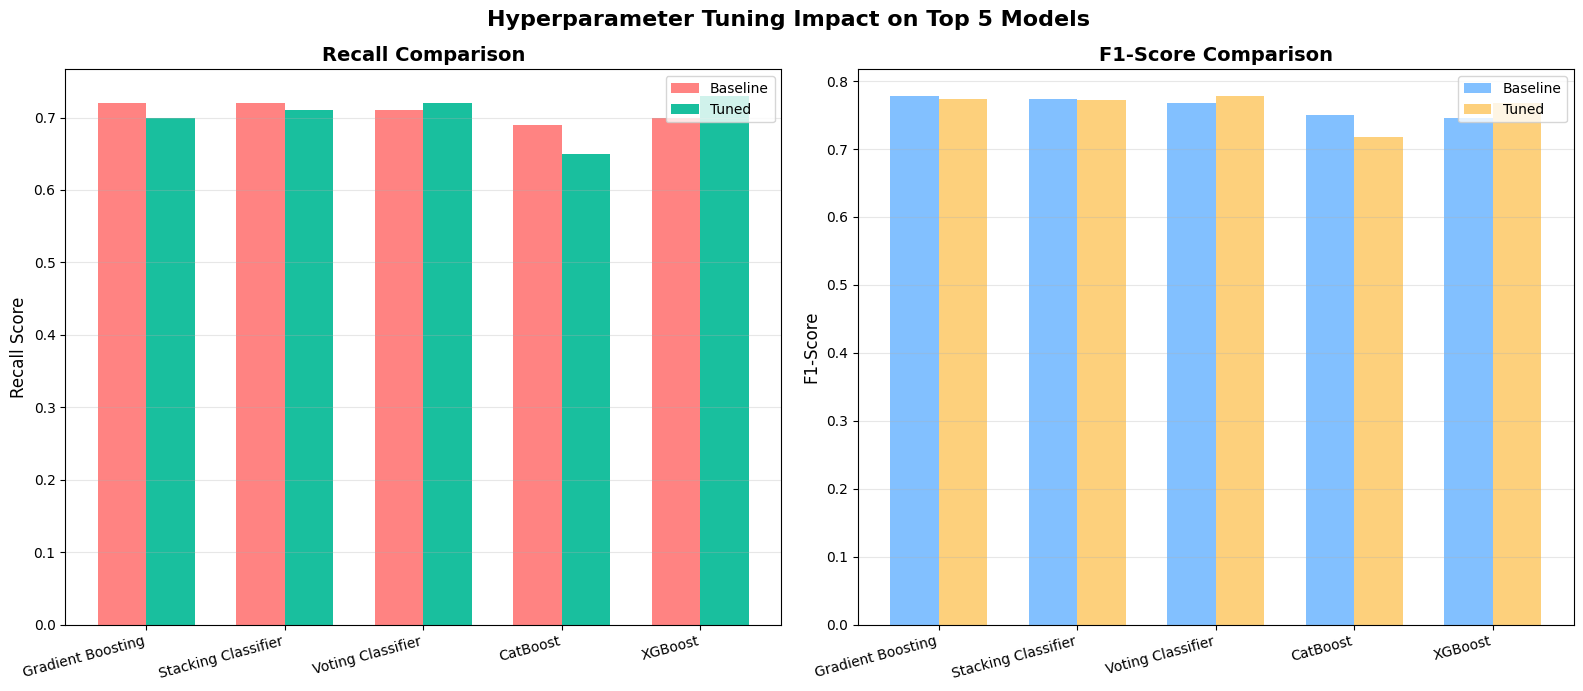

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Hyperparameter Tuning Impact on Top 5 Models', fontsize=16, fontweight='bold')

plot_models = []
plot_baseline_recall = []
plot_tuned_recall = []
plot_baseline_f1 = []
plot_tuned_f1 = []

for model_name in top_5_names:
    baseline_rows = comparison_df[(comparison_df['Model'] == model_name) &
                                 (comparison_df['Version'] == 'Baseline')]
    tuned_rows = comparison_df[(comparison_df['Model'] == model_name) &
                              (comparison_df['Version'] == 'Tuned')]

    if baseline_rows.empty or tuned_rows.empty:
        continue

    plot_models.append(model_name)
    plot_baseline_recall.append(baseline_rows.iloc[0]['Recall'])
    plot_tuned_recall.append(tuned_rows.iloc[0]['Recall'])
    plot_baseline_f1.append(baseline_rows.iloc[0]['F1-Score'])
    plot_tuned_f1.append(tuned_rows.iloc[0]['F1-Score'])

x = np.arange(len(plot_models))
width = 0.35

# Recall Chart
axes[0].bar(x - width/2, plot_baseline_recall, width, label='Baseline', color='#ff7675', alpha=0.9)
axes[0].bar(x + width/2, plot_tuned_recall, width, label='Tuned', color='#00b894', alpha=0.9)
axes[0].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Recall Score', fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(plot_models, rotation=15, ha='right', fontsize=10)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# F1-Score Chart
axes[1].bar(x - width/2, plot_baseline_f1, width, label='Baseline', color='#74b9ff', alpha=0.9)
axes[1].bar(x + width/2, plot_tuned_f1, width, label='Tuned', color='#fdcb6e', alpha=0.9)
axes[1].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('F1-Score', fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels(plot_models, rotation=15, ha='right', fontsize=10)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("="*80)
print(f"FINAL BEST MODEL: {best_model_name}")
print("="*80)
print(f"Recall:     {tuned_df.iloc[0]['Recall']:.4f}")
print(f"Precision:  {tuned_df.iloc[0]['Precision']:.4f}")
print(f"F1-Score:   {tuned_df.iloc[0]['F1-Score']:.4f}")
print(f"ROC-AUC:    {tuned_df.iloc[0]['ROC-AUC']:.4f}")

FINAL BEST MODEL: XGBoost (Tuned)
Recall:     0.7300
Precision:  0.8111
F1-Score:   0.7684
ROC-AUC:    0.8944


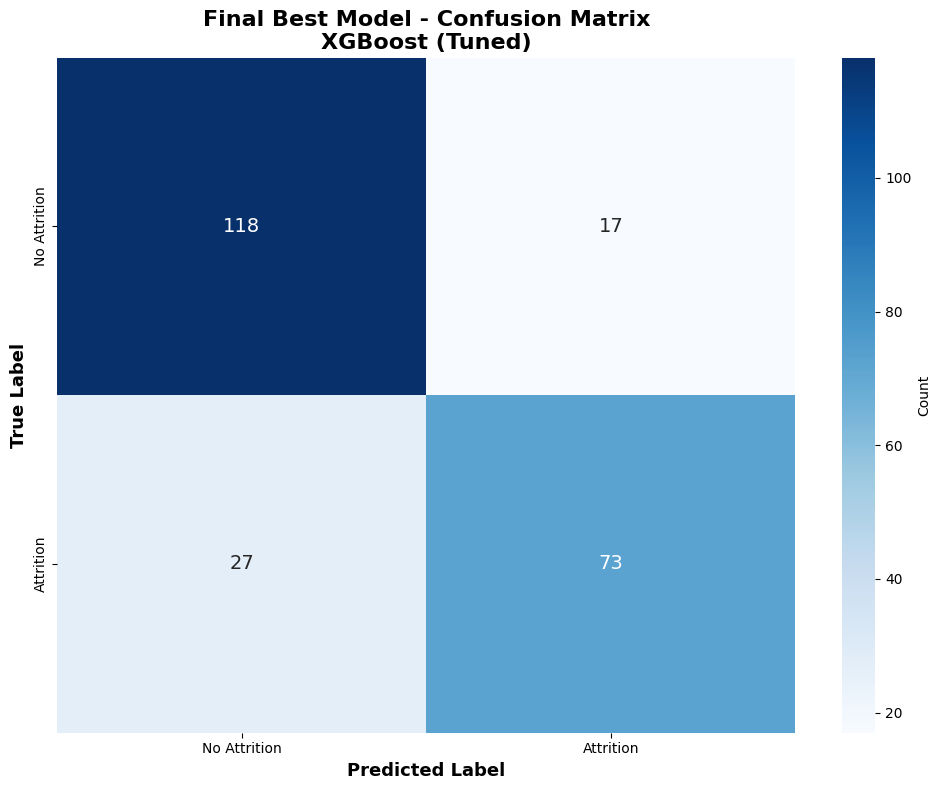

In [ ]:
# Final confusion matrix
y_pred_final = best_model_obj.predict(X_test_final)
cm_final = confusion_matrix(y_test_final, y_pred_final)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'],
            cbar_kws={'label': 'Count'}, annot_kws={'size': 14})
plt.title(f'Final Best Model - Confusion Matrix\n{best_model_name}',
          fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test_final, y_pred_final,
                            target_names=['No Attrition (0)', 'Attrition (1)'],
                            zero_division=0))

                  precision    recall  f1-score   support

No Attrition (0)       0.81      0.87      0.84       135
   Attrition (1)       0.81      0.73      0.77       100

        accuracy                           0.81       235
       macro avg       0.81      0.80      0.81       235
    weighted avg       0.81      0.81      0.81       235



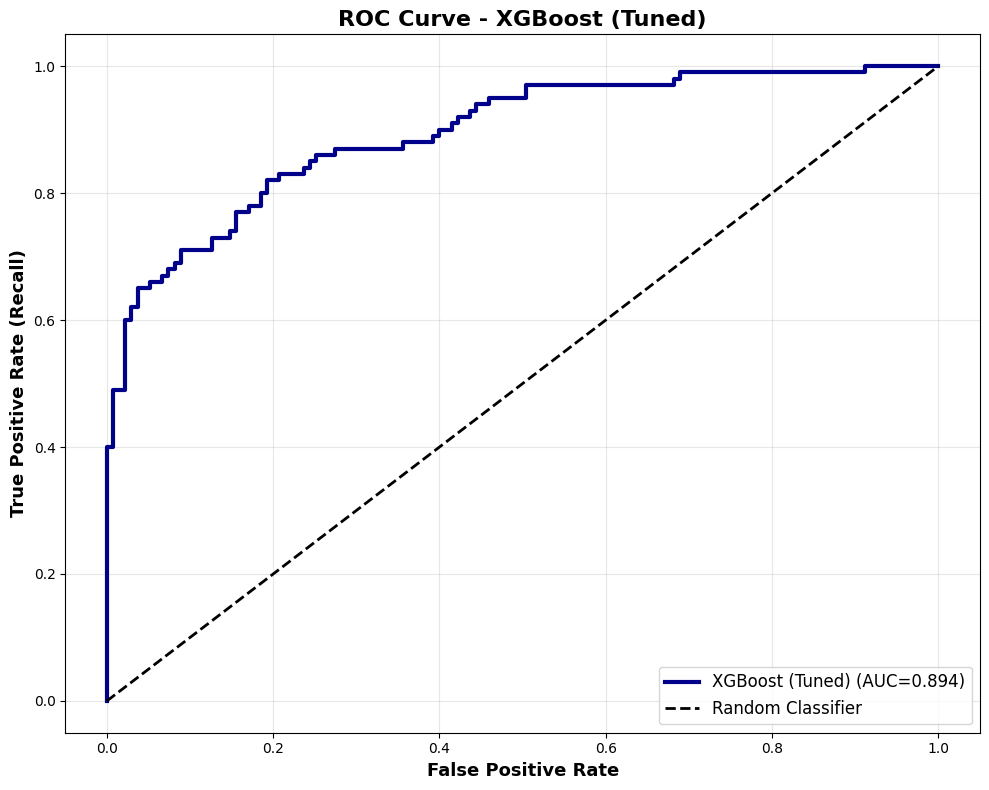

In [ ]:
# ROC Curve
if hasattr(best_model_obj, 'predict_proba'):
    y_pred_proba_final = best_model_obj.predict_proba(X_test_final)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_proba_final)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, linewidth=3,
             label=f'{best_model_name} (AUC={tuned_df.iloc[0]["ROC-AUC"]:.3f})',
             color='darkblue')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
    plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
    plt.ylabel('True Positive Rate (Recall)', fontsize=13, fontweight='bold')
    plt.title(f'ROC Curve - {best_model_name}', fontsize=16, fontweight='bold')
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


✓ Top 20 Most Important Features:
                                  Feature  Importance
                        Job_Opportunities    0.095177
                         Years_Experience    0.083169
        Years_experience_lastorganization    0.074332
                   Get_Deserved_Promotion    0.058315
                                 JobTitle    0.054606
                            Job_Stability    0.046768
Training_programs_During_last_three_years    0.028530
                           Job_Engagement    0.028069
                     Emotional_Commitment    0.025737
                              Recognition    0.025123
                              Job_Support    0.025112
                               Allowances    0.024684
                        Work_Live_Balance    0.024565
               Rewards_Wages_Satisfaction    0.024401
                         Distance_to_work    0.022903
                 Useful_Training_Programs    0.022595
                                    Bonus    0.

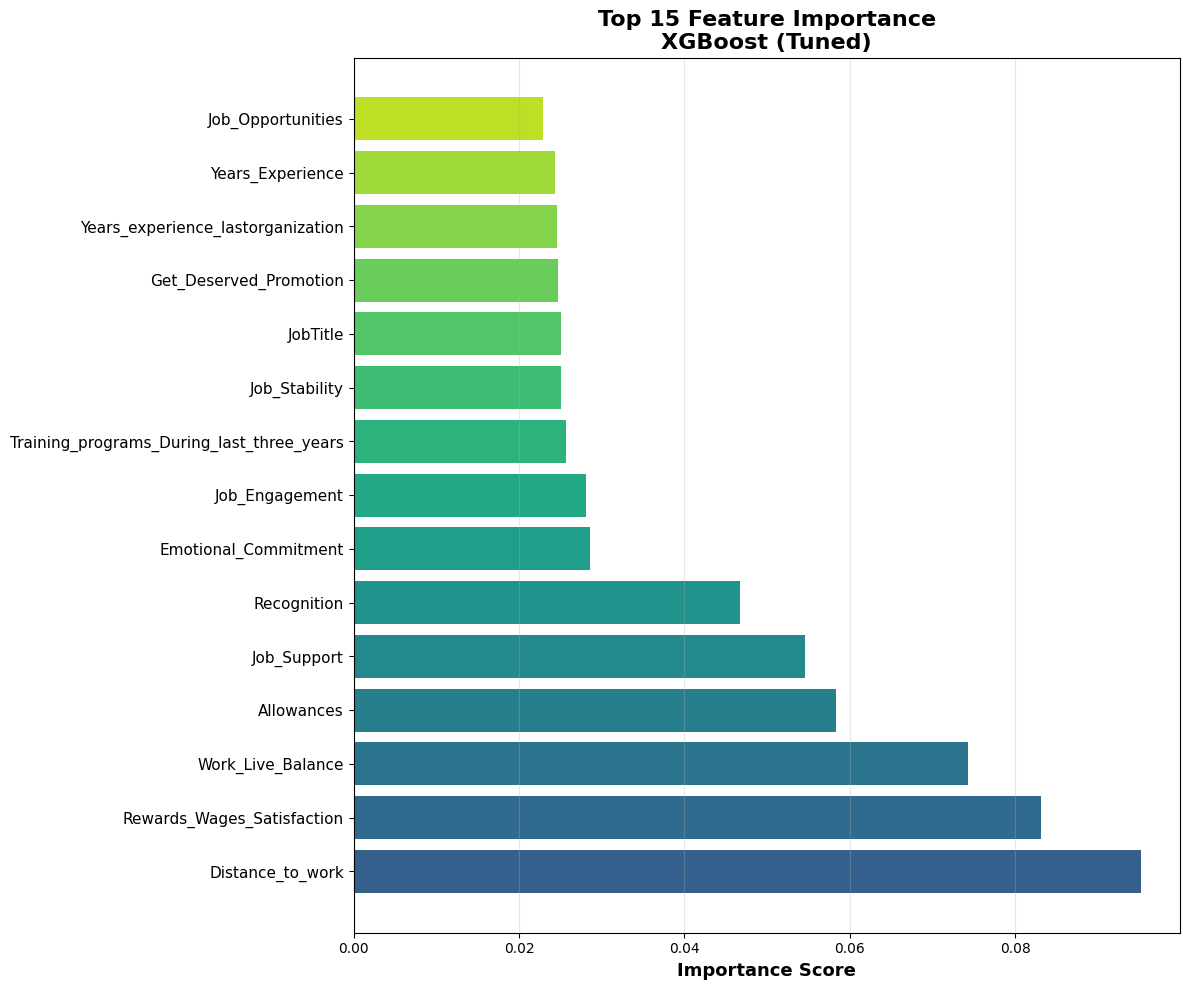

In [ ]:
feature_names = X_test_final.columns
importances = None

if hasattr(best_model_obj, 'feature_importances_'):
    importances = best_model_obj.feature_importances_
elif 'CatBoost' in str(type(best_model_obj)):
    importances = best_model_obj.get_feature_importance()
elif 'Voting' in best_model_name or 'Stacking' in best_model_name:
    print("⚠️ Ensemble model - showing average importance from base estimators")

    if 'Voting' in best_model_name:
        estimators = best_model_obj.estimators_
    else:  # Stacking
        estimators = best_model_obj.estimators_

    all_importances = []
    for est in estimators:
        if hasattr(est, 'feature_importances_'):
            all_importances.append(est.feature_importances_)
        elif 'CatBoost' in str(type(est)):
            all_importances.append(est.get_feature_importance())

    if all_importances:
        importances = np.mean(all_importances, axis=0)

if importances is not None:
    fi_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False).reset_index(drop=True)

    print("\n✓ Top 20 Most Important Features:")
    print(fi_df.head(20).to_string(index=False))

    # Horizontal bar chart
    plt.figure(figsize=(12, 10))
    top_15 = fi_df.head(15)
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_15)))
    plt.barh(range(len(top_15)-1, -1, -1), top_15['Importance'], color=colors)
    plt.yticks(range(len(top_15)), top_15['Feature'], fontsize=11)
    plt.xlabel('Importance Score', fontsize=13, fontweight='bold')
    plt.title(f'Top 15 Feature Importance\n{best_model_name}',
              fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("✗ Feature importance not available for this model type")

#